# PROYECTO INDIVIDUAL 2 - DATA ANALYTYCS

## JOAQUIN MILLAN LANHOZO

### SOY HENRY

# EXPLORACION DE LA API Y FUENTES DE DATOS

In [301]:
# Importo librerias

import pandas as pd
import datetime as dt
import time as t
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import plot
from pycoingecko import CoinGeckoAPI
import requests
from datetime import datetime, timedelta
import yfinance as yf
import datetime

# API Coingecko

https://www.coingecko.com/es/api/documentation

In [302]:
#Instalar la API para poder conectar y extraer informacion de Coingecko

#pip install pycoingecko


In [303]:
# Creo la instancia

cg = CoinGeckoAPI()

In [304]:
# Check de conexion

cg.ping()

{'gecko_says': '(V3) To the Moon!'}

In [305]:
# Prueba de funciones de la API.
# Funcion que necesita dos argumentos, criptomoneda y moneda, para traer el precio actual

cg.get_price(ids='bitcoin', vs_currencies='usd')


{'bitcoin': {'usd': 25949}}

In [306]:
# Lista de monedas en la API. "supported_vs_currencies" es el parametro the CoinGecko que muestra la lista de las monedas
# que son fiat o criptomonedas con las cuales se pueden obtener precios y su informacion

currencies = cg.get_supported_vs_currencies()
currencies = pd.DataFrame(currencies)
currencies = currencies.rename(columns = {0: "coins"})
currencies

# No son todas, pero son monedas con las que se pueden operar en los exchanges

,coins
0,btc
1,eth
2,ltc
3,bch
4,bnb
...,...
56,xdr
57,xag
58,xau
59,bits


In [307]:
# Para el proyecto, voy a eligir estas 10 monedas, las que mas market cap tienen: 
# BTC - BITCOIN; ETH - ETHEREUM; USDT - TETHER USDT; BNB - BNB; XRP -XRP;
# USDC - USD COIN; DOGE - DOGECOIN; ADA - CARDANO; SOL - SOLANA; TRX - TRON

currencies[currencies["coins"]=="btc"]
choose_coins = ["btc", "eth", "usdt", "bnb", "xrp", "usdc", "doge", "ada", "sol","trx"]
currencies[currencies["coins"]=="btc"]

# Checkeo cuantas se encuentran en esta fiat list, es decir monedas en las cuales se pueden transaccionar
filtered_df = currencies[currencies['coins'].isin(choose_coins)]
filtered_df

,coins
0,btc
1,eth
4,bnb
6,xrp


In [308]:
# Traigo la lista de monedas, en CoinGecko

coins = cg.get_coins_list()
df_coins = pd.DataFrame.from_dict(coins).sort_values("id").reset_index(drop=True)
df_coins

# Como podemos ver, hay 10064 monedas.

,id,symbol,name
0,01coin,zoc,01coin
1,0chain,zcn,Zus
2,0vix-protocol,vix,0VIX Protocol
3,0x,zrx,0x Protocol
4,0x0-ai-ai-smart-contract,0x0,0x0.ai: AI Smart Contract
...,...,...,...
10130,zyberswap,zyb,Zyberswap
10131,zynecoin,zyn,Zynecoin
10132,zynergy,zyn,Zynergy
10133,zyx,zyx,ZYX


In [309]:
# Reviso que las monedas elegidas esten en la API

coins_df = df_coins[df_coins['symbol'].isin(choose_coins)]
coins_df.sort_values(by = "symbol")

,id,symbol,name
1103,binance-peg-cardano,ada,Binance-Peg Cardano
1617,cardano,ada,Cardano
1098,binance-coin-wormhole,bnb,Binance Coin (Wormhole)
1117,binancecoin,bnb,BNB
6290,oec-binance-coin,bnb,OEC Binance Coin
4025,heco-peg-bnb,bnb,Heco-Peg Binance Coin
1156,bitcoin,btc,Bitcoin
1104,binance-peg-dogecoin,doge,Binance-Peg Dogecoin
2677,doge-on-pulsechain,doge,Doge on Pulsechain
2688,dogecoin,doge,Dogecoin


In [310]:
# Veo que las monedas que quiero por su simbolo estan repetidas, con lo cual es conveniente filtrar por el id|nombre
# "btc" - bitcoin,"eth"- ethereum, "usdt" - tether , "bnb" - binancecoin, "xrp" - ripple, "usdc" - usd-coin, 
# "doge" - dogecoin, "ada"- cardano, "sol" - solana,"trx" - tron


# Si hay varias monedas con el mismo ID, puede ser que sea debido a el hecho de que hay diferentes versiones o implementaciones
# de la critpomoneda en varias redes de blockchain.

# Lista de monedas con el precio actual de mercado, su pico y su piso dentro de las ultimas 24 horas

coin_market = cg.get_coins_markets(vs_currency='usd')
df_market = pd.DataFrame(coin_market, columns = ["id","current_price", "high_24h", "low_24h" ])
df_market.head(11)

,id,current_price,high_24h,low_24h
0,bitcoin,25934.000000,26206.000000,25762.000000
1,ethereum,1637.100000,1674.640000,1623.040000
2,tether,1.001000,1.001000,0.996619
3,binancecoin,208.310000,211.900000,204.210000
4,ripple,0.511904,0.524795,0.507130
5,usd-coin,1.002000,1.002000,0.996666
6,staked-ether,1631.350000,1674.570000,1621.450000
7,cardano,0.255150,0.265123,0.252025
8,dogecoin,0.061767,0.063199,0.061087
9,solana,20.260000,21.370000,20.030000


In [311]:
# Filtro el market df con las monedas elegidas, lo cual significa que puedo trabajar con las elegidas

ids_choose_coins = ["bitcoin", "ethereum", "tether", "binancecoin", "ripple", "usd-coin", "dogecoin", "cardano", "solana", "tron"]

df_choose_coins = df_market[df_market["id"].isin(ids_choose_coins)]
df_choose_coins

,id,current_price,high_24h,low_24h
0,bitcoin,25934.000000,26206.000000,25762.000000
1,ethereum,1637.100000,1674.640000,1623.040000
2,tether,1.001000,1.001000,0.996619
3,binancecoin,208.310000,211.900000,204.210000
4,ripple,0.511904,0.524795,0.507130
5,usd-coin,1.002000,1.002000,0.996666
7,cardano,0.255150,0.265123,0.252025
8,dogecoin,0.061767,0.063199,0.061087
9,solana,20.260000,21.370000,20.030000
10,tron,0.074759,0.075311,0.074523


In [312]:
# Obtener informacion de una moneda especifica

cg.get_coin_by_id(id="bitcoin")

{'id': 'bitcoin',
 'symbol': 'btc',
 'name': 'Bitcoin',
 'asset_platform_id': None,
 'platforms': {'': ''},
 'detail_platforms': {'': {'decimal_place': None, 'contract_address': ''}},
 'block_time_in_minutes': 10,
 'hashing_algorithm': 'SHA-256',
 'categories': ['Cryptocurrency', 'Layer 1 (L1)'],
 'public_notice': None,
 'additional_notices': [],
 'localization': {'en': 'Bitcoin',
  'de': 'Bitcoin',
  'es': 'Bitcoin',
  'fr': 'Bitcoin',
  'it': 'Bitcoin',
  'pl': 'Bitcoin',
  'ro': 'Bitcoin',
  'hu': 'Bitcoin',
  'nl': 'Bitcoin',
  'pt': 'Bitcoin',
  'sv': 'Bitcoin',
  'vi': 'Bitcoin',
  'tr': 'Bitcoin',
  'ru': 'Биткоин',
  'ja': 'ビットコイン',
  'zh': '比特币',
  'zh-tw': '比特幣',
  'ko': '비트코인',
  'ar': 'بيتكوين',
  'th': 'บิตคอยน์',
  'id': 'Bitcoin',
  'cs': 'Bitcoin',
  'da': 'Bitcoin',
  'el': 'Bitcoin',
  'hi': 'Bitcoin',
  'no': 'Bitcoin',
  'sk': 'Bitcoin',
  'uk': 'Bitcoin',
  'he': 'Bitcoin',
  'fi': 'Bitcoin',
  'bg': 'Bitcoin',
  'hr': 'Bitcoin',
  'lt': 'Bitcoin',
  'sl': 'Bitcoin

In [313]:
# Obtener mas variables de la moneda

cg.get_price(ids='bitcoin', vs_currencies='usd', include_market_cap='true', include_24hr_vol='true', include_24hr_change='true', include_last_updated_at='true')

{'bitcoin': {'usd': 25852,
  'usd_market_cap': 502487944460.8738,
  'usd_24h_vol': 11100839724.64914,
  'usd_24h_change': -0.736262965686525,
  'last_updated_at': 1692729277}}

In [314]:
# Obtener el valor de moneda en una fecha especifica

data = cg.get_coin_history_by_id(id='bitcoin',date='10-11-2020', localization='false')
data

{'id': 'bitcoin',
 'symbol': 'btc',
 'name': 'Bitcoin',
 'image': {'thumb': 'https://assets.coingecko.com/coins/images/1/thumb/bitcoin.png?1547033579',
  'small': 'https://assets.coingecko.com/coins/images/1/small/bitcoin.png?1547033579'},
 'market_data': {'current_price': {'aed': 56326.52786980459,
   'ars': 1215617.24070744,
   'aud': 21082.415040368352,
   'bch': 58.03006574753659,
   'bdt': 1301263.6700267561,
   'bhd': 5783.172237724017,
   'bmd': 15335.342198178862,
   'bnb': 548.489735186886,
   'brl': 82599.20481248871,
   'btc': 1.0,
   'cad': 19947.369687570146,
   'chf': 13994.941278004791,
   'clp': 11618071.458796967,
   'cny': 101667.18463704686,
   'czk': 343849.04276756675,
   'dkk': 96585.05223257001,
   'dot': 3530.9500103196324,
   'eos': 6136.865733687228,
   'eth': 34.44319624770999,
   'eur': 12970.985144090215,
   'gbp': 11647.729136493797,
   'hkd': 118887.24039138111,
   'huf': 4657417.832667269,
   'idr': 218928088.9852976,
   'ils': 51595.14541208477,
   'inr

In [315]:
# Informacion por hora por los ultimos 3 dias

cg.get_coin_market_chart_by_id(id='bitcoin',vs_currency='usd',days='3')

{'prices': [[1692471654244, 26117.068167445384],
  [1692475238987, 26115.91295705558],
  [1692478854746, 26066.81117232809],
  [1692482455861, 26079.848473647606],
  [1692486059861, 26048.878765836904],
  [1692489614628, 26104.778630797897],
  [1692493271740, 26178.061352790806],
  [1692496866788, 26048.90225598771],
  [1692500453715, 26085.30092945651],
  [1692504095078, 26097.71506912193],
  [1692507665518, 26104.790286374613],
  [1692511247533, 26070.830102000964],
  [1692514856750, 26061.314036466334],
  [1692518419157, 26079.53268910184],
  [1692522068399, 26104.061017929005],
  [1692525602604, 26126.855946052798],
  [1692529251864, 26142.296742431874],
  [1692532852788, 26165.98150257639],
  [1692536459722, 26174.95403308114],
  [1692540003354, 26138.2490619584],
  [1692543647811, 26102.203765231283],
  [1692547225530, 26063.565339380435],
  [1692550852665, 26031.129626270158],
  [1692554432210, 26132.785558999676],
  [1692558001555, 26137.096569204714],
  [1692561658105, 26137.3

In [316]:
# Para obtener data historica con un rango de tiempo Unixtimestamp

cg.get_coin_market_chart_range_by_id(id='bitcoin',vs_currency='usd',from_timestamp='1605096000',to_timestamp='1605099600')

# https://www.unixtimestamp.com/  Segundos desde enero 1 1970

{'prices': [[1605097140839, 15542.025002631644]],
 'market_caps': [[1605097140839, 288154238228.85516]],
 'total_volumes': [[1605097140839, 21415724096.16228]]}

In [317]:
# Plataformas Crypto donde se pueden tradear monedas

assetPlatformsList= cg.get_asset_platforms()
assetPlatforms = pd.DataFrame.from_dict(assetPlatformsList).sort_values("id").reset_index(drop=True)
assetPlatforms

,id,chain_identifier,name,shortname
0,,NaN,Picasso,
1,,NaN,Alephium,
2,,NaN,Matrix,
3,,NaN,Radix,
4,Bitcichain,NaN,Bitcichain,Bitcichain
...,...,...,...,...
162,xdc-network,50.0,XDC Network,xdc xinfin
163,xrp,NaN,XRP Ledger,xrp
164,yocoin,NaN,Yocoin,yocoin
165,zilliqa,NaN,Zilliqa,


In [318]:
# Categoria de transacciones

coinCategoryList= pd.DataFrame(cg.get_coins_categories(order = "market_cap_desc"))
coinCategoryList

,id,name,market_cap,market_cap_change_24h,content,top_3_coins,volume_24h,updated_at
0,layer-1,Layer 1 (L1),7.823482e+11,-1.221957,,[https://assets.coingecko.com/coins/images/1/s...,1.896985e+10,2023-08-22T18:40:27.464Z
1,smart-contract-platform,Smart Contract Platform,2.994726e+11,-3.643790,Smart contract platforms are usually blockchai...,[https://assets.coingecko.com/coins/images/279...,1.037097e+10,2023-08-22T18:40:11.282Z
2,stablecoins,Stablecoins,1.246020e+11,0.243810,,[https://assets.coingecko.com/coins/images/325...,2.302527e+10,2023-08-22T18:40:10.894Z
3,alleged-sec-securities,Alleged SEC Securities,8.006149e+10,-4.609876,Tokens and cryptocurrencies alleged to be secu...,[https://assets.coingecko.com/coins/images/825...,3.710285e+09,2023-08-22T18:40:08.700Z
4,exchange-based-tokens,Exchange-based Tokens,5.136390e+10,-4.017405,These tokens are normally associated with both...,[https://assets.coingecko.com/coins/images/825...,1.200700e+09,2023-08-22T18:40:13.352Z
...,...,...,...,...,...,...,...,...
111,linea-ecosystem,Linea Ecosystem,NaN,NaN,,[https://assets.coingecko.com/coins/images/297...,NaN,None
112,mantle-ecosystem,Mantle Ecosystem,NaN,NaN,,[https://assets.coingecko.com/coins/images/325...,NaN,None
113,base-ecosystem,Base Ecosystem,NaN,NaN,,[https://assets.coingecko.com/coins/images/995...,NaN,2023-07-31T06:41:01.295Z
114,friend-tech,friend.tech,0.000000e+00,0.000000,,[https://assets.coingecko.com/coins/images/313...,1.612767e+04,2023-08-22T18:40:06.933Z


In [319]:
#by category see cg.get_coins_categories_list(), in order
coinsMktDataByCategory = cg.get_coins_markets(vs_currency = 'usd',
                                    category = 'stablecoins',
                                    order = 'volume_desc')

coinsMktDataByCategory

[{'id': 'tether',
  'symbol': 'usdt',
  'name': 'Tether',
  'image': 'https://assets.coingecko.com/coins/images/325/large/Tether.png?1668148663',
  'current_price': 0.999809,
  'market_cap': 82837497981,
  'market_cap_rank': 3,
  'fully_diluted_valuation': 82837497981,
  'total_volume': 16750331220,
  'high_24h': 1.001,
  'low_24h': 0.996619,
  'price_change_24h': -0.000164648594960237,
  'price_change_percentage_24h': -0.01647,
  'market_cap_change_24h': 12585953,
  'market_cap_change_percentage_24h': 0.0152,
  'circulating_supply': 82853331627.822,
  'total_supply': 82853331627.822,
  'max_supply': None,
  'ath': 1.32,
  'ath_change_percentage': -24.4341,
  'ath_date': '2018-07-24T00:00:00.000Z',
  'atl': 0.572521,
  'atl_change_percentage': 74.6327,
  'atl_date': '2015-03-02T00:00:00.000Z',
  'roi': None,
  'last_updated': '2023-08-22T18:40:00.470Z'},
 {'id': 'usd-coin',
  'symbol': 'usdc',
  'name': 'USD Coin',
  'image': 'https://assets.coingecko.com/coins/images/6319/large/USD_Co

In [320]:
# Get trending coins
cg.get_search_trending()

{'coins': [{'item': {'id': 'apecoin',
    'coin_id': 24383,
    'name': 'ApeCoin',
    'symbol': 'APE',
    'market_cap_rank': 68,
    'thumb': 'https://assets.coingecko.com/coins/images/24383/thumb/apecoin.jpg?1647476455',
    'small': 'https://assets.coingecko.com/coins/images/24383/small/apecoin.jpg?1647476455',
    'large': 'https://assets.coingecko.com/coins/images/24383/large/apecoin.jpg?1647476455',
    'slug': 'apecoin',
    'price_btc': 5.660569710061177e-05,
    'score': 0}},
  {'item': {'id': 'bitrock',
    'coin_id': 30987,
    'name': 'Bitrock',
    'symbol': 'BROCK',
    'market_cap_rank': 751,
    'thumb': 'https://assets.coingecko.com/coins/images/30987/thumb/20230713_155626.png?1689563465',
    'small': 'https://assets.coingecko.com/coins/images/30987/small/20230713_155626.png?1689563465',
    'large': 'https://assets.coingecko.com/coins/images/30987/large/20230713_155626.png?1689563465',
    'slug': 'bitrock',
    'price_btc': 5.767583065726764e-06,
    'score': 1}},


In [321]:
# Listado de exchanges y su ranking de confianza

data = cg.get_exchanges_list()
df =pd.DataFrame(data, columns=['name', 'trust_score','trust_score_rank'])
df.set_index('name',inplace=True)
df.head()

,trust_score,trust_score_rank
name,,
Binance,10,1
Coinbase Exchange,10,2
Bybit,10,3
Kraken,10,4
KuCoin,10,5


In [322]:
#get list of exchanges

exchgList = cg.get_exchanges_list(per_page = 250, page = 1)
exchgDataFrame = pd.DataFrame.from_dict(exchgList
                              ).sort_values('trade_volume_24h_btc_normalized',
                                            ascending = False
                              ).reset_index(drop=True)
exchgDataFrame

,id,name,year_established,country,description,url,image,has_trading_incentive,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
0,binance,Binance,2017.0,Cayman Islands,,https://www.binance.com/,https://assets.coingecko.com/markets/images/52...,False,10.0,1.0,211396.575031,130560.683816
1,gdax,Coinbase Exchange,2012.0,United States,,https://coinbase-consumer.sjv.io/coingecko,https://assets.coingecko.com/markets/images/23...,False,10.0,2.0,33544.632140,33544.632140
2,digifinex,DigiFinex,2018.0,Seychelles,,https://www.digifinex.com/,https://assets.coingecko.com/markets/images/22...,False,8.0,15.0,29544.359717,29544.359717
3,bybit_spot,Bybit,2018.0,British Virgin Islands,Bybit is a cryptocurrency exchange that offers...,https://www.bybit.com,https://assets.coingecko.com/markets/images/69...,False,10.0,3.0,27019.073459,27019.073459
4,bitmart,BitMart,2017.0,Cayman Islands,,https://www.bitmart.com/en,https://assets.coingecko.com/markets/images/23...,False,7.0,43.0,30169.951591,24873.092760
...,...,...,...,...,...,...,...,...,...,...,...,...
245,smardex-arbitrum,SmarDex (Arbitrum),2023.0,Switzerland,SMARDEX is an Automated Market Maker (AMM) tha...,https://smardex.io/,missing_small.png,False,6.0,131.0,2.910533,0.000000
246,smardex-polygon,SmarDex (Polygon),2023.0,Switzerland,SMARDEX is an Automated Market Maker (AMM) tha...,https://smardex.io/,https://assets.coingecko.com/markets/images/12...,False,6.0,128.0,1.148163,0.000000
247,fairdesk,Fairdesk,NaN,Singapore,,https://www.fairdesk.com/,https://assets.coingecko.com/markets/images/10...,False,6.0,129.0,471.137344,0.000000
248,icrypex,Icrypex,2018.0,Turkey,Welcome to ICRYPEX - where the future of finan...,https://www.icrypex.com/en,https://assets.coingecko.com/markets/images/12...,False,6.0,130.0,1981.148014,0.000000


In [323]:
#get exchg volume (in BTC?) // days param has a limit, returns 503 errors
exchgVolume = cg.get_exchanges_volume_chart_by_id(id="binance", days= 30)

<Axes: xlabel='Date'>

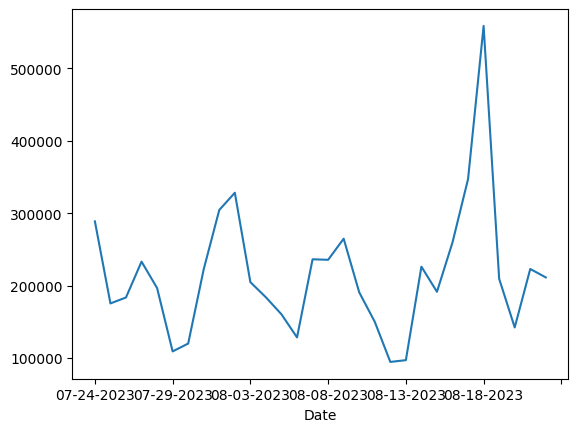

In [324]:
#list to dataframe
exchgVolumeDataFrame = pd.DataFrame(exchgVolume,  columns = ['Date', 'Volume'])

#reformat date
exchgVolumeDataFrame['Date'] = exchgVolumeDataFrame['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%m-%d-%Y'))
#reformat volume
exchgVolumeDataFrame['Volume'] = pd.to_numeric(exchgVolumeDataFrame['Volume'])

#set index
exchgVolumeDataFrame = exchgVolumeDataFrame.set_index('Date')

#plot
exchgVolumeDataFrame['Volume'].plot()


In [537]:
#get OHLC data for preset range 1/7/14/30/90/180/365/max
#candle body width by date range 
#1 - 2 days: 30 minutes
#3 - 30 days: 4 hours
#31 days and beyond: 4 days

# plt.figsize(20,10)
ohlcData = cg.get_coin_ohlc_by_id(id = 'bitcoin', 
                                  vs_currency = 'usd', 
                                  days = '365')
#list to dataframe
ohlcDataFrame = pd.DataFrame(data = ohlcData,
                           columns = ['Date', 'Open', 'High' ,'Low', 'Close'])
#reformat date
ohlcDataFrame['Date'] = ohlcDataFrame['Date'].apply(
                        lambda x: dt.datetime.fromtimestamp(x/1000
                        ).strftime('%m-%d-%Y'))
#set index
ohlcDataFrame = ohlcDataFrame.set_index('Date')

#generate plotly figure
fig = go.Figure(data=[go.Candlestick(x=ohlcDataFrame.index,
                open=ohlcDataFrame['Open'],
                high=ohlcDataFrame['High'],
                low=ohlcDataFrame['Low'],
                close=ohlcDataFrame['Close'])])

fig

dict_keys(['prices', 'market_caps', 'total_volumes'])


<Axes: xlabel='Date'>

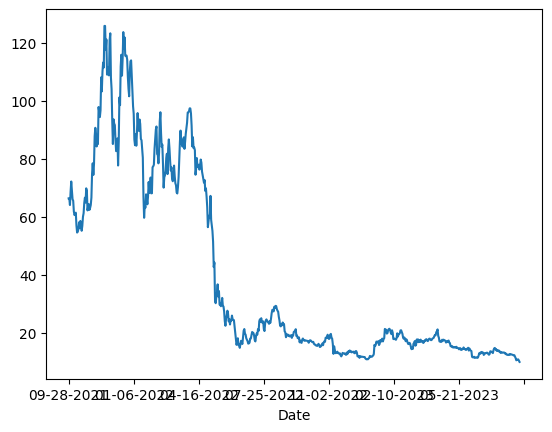

In [326]:
#get historical market data - price, mkt cap, and volume / days = 1 to 'max'
#similar data points to .get_coin_market_chart_by_id()
coinChartData = cg.get_coin_market_chart_from_contract_address_by_id(
                            id = 'binance-smart-chain', 
                            contract_address = '0x1ce0c2827e2ef14d5c4f' +
                                               '29a091d735a204794041',
                            vs_currency = 'usd',
                            days = 'max')

coinChartDataRng = cg.get_coin_market_chart_range_from_contract_address_by_id(
                            id = 'binance-smart-chain', 
                            contract_address = '0x1ce0c2827e2ef14d5c4f' +
                                               '29a091d735a204794041',
                            vs_currency = 'usd',
                            from_timestamp = t.time()-100000, 
                            to_timestamp = t.time())

#display
print(coinChartData.keys())

#list of lists to dataframe 
coinChartDataFrame = pd.DataFrame(data = coinChartData['prices'],
                                        columns = ['Date', 'Price'])
#reformat date
coinChartDataFrame['Date'] = coinChartDataFrame['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%m-%d-%Y'))
#set index
coinChartDataFrame = coinChartDataFrame.set_index('Date')

#plot
coinChartDataFrame['Price'].plot()

El "boom" de las criptomonedas que condujo a un aumento significativo en su comercio y valor ocurrió principalmente en el año 2017. Durante ese período, muchas criptomonedas experimentaron un aumento explosivo en su precio y volumen de operaciones. La criptomoneda más conocida y emblemática, Bitcoin (BTC), también alcanzó máximos históricos durante este tiempo.

El período de aumento masivo en el comercio y la valoración de las criptomonedas se conoce como el "rally alcista de 2017". Durante este período, el interés público en las criptomonedas y la tecnología blockchain aumentó considerablemente. Se observaron aumentos de precio de dos, tres o incluso más dígitos en un corto período de tiempo para muchas criptomonedas.

El "rally alcista de 2017" culminó en diciembre de ese año, cuando el precio de Bitcoin alcanzó un máximo histórico cercano a los $20,000 dólares. Sin embargo, después de este período de aumento masivo, hubo una corrección significativa en los precios de muchas criptomonedas en 2018.

Es importante tener en cuenta que los mercados de criptomonedas son altamente volátiles y sujetos a cambios bruscos en los precios. El auge de 2017 es solo un ejemplo destacado de la volatilidad y el crecimiento experimentados por el mercado de criptomonedas en su historia temprana.


Es por eso, que los dataframes los voy a armar desde el 2017 para poder ver el inicio del crecimiento y como fueron desenvolviendose en el tiempo

In [327]:
# Miro los tiempos en  timestamp para poder armar dataframe con la informacion que quiero de las criptomonedas elegidas, con
# info historica

timestamp_actual = int(t.time())

# Crear una estructura de tiempo para enero de 2013
timestamp_20170101 = t.strptime("2017-01-01", "%Y-%m-%d")
timestamp_inicio = int(t.mktime(timestamp_20170101))



In [515]:
def get_historical_prices(coin_id, from_timestamp, to_timestamp):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart/range"
    
    params = {
        'vs_currency': 'usd',  # You can change this to any desired currency
        'from': from_timestamp,
        'to': to_timestamp
    }

    response = requests.get(url, params=params)
    data = response.json()

    return data

coin_id = "bitcoin"  # Replace with the desired coin ID
from_timestamp = timestamp_inicio  # Unix timestamp for December 31, 2019
to_timestamp = timestamp_actual  # Unix timestamp for the current date

historical_prices_btc = get_historical_prices(coin_id, from_timestamp, to_timestamp)
historical_prices_btc

# Extract dates and market caps
dates_btc = [entry[0] / 1000 for entry in historical_prices_btc['prices']]  # Convert milliseconds to seconds
prices_btc = [entry[1] for entry in historical_prices_btc['prices']]

# Create a DataFrame with the historical data
data_btc = {'Date': dates_btc, 'Prices': prices_btc}
prices_cg = pd.DataFrame(data_btc)

prices_cg


,Date,Prices
0,1.483315e+09,1019.198800
1,1.483402e+09,1035.531300
2,1.483488e+09,1130.849516
3,1.483574e+09,990.667500
4,1.483661e+09,894.032500
...,...,...
2419,1.692317e+09,26501.587270
2420,1.692403e+09,26042.838257
2421,1.692490e+09,26104.778631
2422,1.692576e+09,26160.700420


In [519]:
def get_historical_market_cap(coin_id, from_timestamp, to_timestamp):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart/range"
    
    params = {
        'vs_currency': 'usd',  # You can change this to any desired currency
        'from': from_timestamp,
        'to': to_timestamp
    }

    response = requests.get(url, params=params)
    data = response.json()

    return data

coin_id = "bitcoin"  # Replace with the desired coin ID
from_timestamp = timestamp_inicio  # Unix timestamp for December 31, 2019
to_timestamp = timestamp_actual  # Unix timestamp for the current date

historical_mkt_btc = get_historical_market_cap(coin_id, from_timestamp, to_timestamp)
historical_mkt_btc

# Extract dates and market caps
dates = [entry[0] / 1000 for entry in historical_mkt_btc['prices']]  # Convert milliseconds to seconds
mkt_cap = [entry[1] for entry in historical_mkt_btc['total_volumes']]

# Create a DataFrame with the historical data
data_mkt_btc = {'Date': dates, 'Market Cap': mkt_cap}
market_cap = pd.DataFrame(data_mkt_btc)

market_cap






,Date,Market Cap
0,1.483315e+09,4.444828e+09
1,1.483402e+09,4.399421e+09
2,1.483488e+09,8.705359e+09
3,1.483574e+09,1.210275e+10
4,1.483661e+09,1.071325e+10
...,...,...
2419,1.692317e+09,2.996559e+10
2420,1.692403e+09,1.806235e+10
2421,1.692490e+09,3.355039e+09
2422,1.692576e+09,8.304370e+09


In [538]:
def get_historical_volume(coin_id, from_timestamp, to_timestamp):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart/range"
    
    params = {
        'vs_currency': 'usd',  # You can change this to any desired currency
        'from': from_timestamp,
        'to': to_timestamp
    }

    response = requests.get(url, params=params)
    data = response.json()

    return data


coin_id = "bitcoin"  # Replace with the desired coin ID
from_timestamp = timestamp_inicio  # Unix timestamp for December 31, 2019
to_timestamp = timestamp_actual  # Unix timestamp for the current date

historical_volume_btc = get_historical_volume(coin_id, from_timestamp, to_timestamp)

# Extract dates and trading volumes
dates_btc = [entry[0] / 1000 for entry in historical_volume_btc['prices']]  # Convert milliseconds to seconds
vol_btc = [entry[1] for entry in historical_volume_btc['total_volumes']]

# Create a DataFrame with the historical data
data_vol_btc = {'Date': dates_btc, 'Trading Volume': vol_btc}
volumen = pd.DataFrame(data_vol_btc)

volumen


,Date,Trading Volume
0,1.483315e+09,4.444828e+09
1,1.483402e+09,4.399421e+09
2,1.483488e+09,8.705359e+09
3,1.483574e+09,1.210275e+10
4,1.483661e+09,1.071325e+10
...,...,...
2419,1.692317e+09,2.996559e+10
2420,1.692403e+09,1.806235e+10
2421,1.692490e+09,3.355039e+09
2422,1.692576e+09,8.304370e+09


In [512]:
def get_historical_open_prices(coin_id, from_timestamp, to_timestamp):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart/range"
    
    params = {
        'vs_currency': 'usd',
        'from': from_timestamp,
        'to': to_timestamp
    }

    response = requests.get(url, params=params)
    data = response.json()

    return data

coin_id = "bitcoin"
from_timestamp = timestamp_inicio  # Unix timestamp for December 31, 2019
to_timestamp = timestamp_actual  # Unix timestamp for the current date

open_price_data_btc = get_historical_open_prices(coin_id, from_timestamp, to_timestamp)

# Extract dates and open prices
dates_btc = [entry[0] / 1000 for entry in open_price_data_btc['prices']]
open_prices_btc = [entry[1] for entry in open_price_data_btc['prices']]

# Create a DataFrame with the historical data
data_ap_btc = {'Date': dates_btc, 'Open Price': open_prices_btc}
apertura = pd.DataFrame(data_ap_btc)

apertura



,Date,Open Price
0,1.483315e+09,1019.198800
1,1.483402e+09,1035.531300
2,1.483488e+09,1130.849516
3,1.483574e+09,990.667500
4,1.483661e+09,894.032500
...,...,...
2419,1.692317e+09,26501.587270
2420,1.692403e+09,26042.838257
2421,1.692490e+09,26104.778631
2422,1.692576e+09,26160.700420


In [332]:
def get_historical_closing_prices(coin_id, from_timestamp, to_timestamp):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart/range"
    
    params = {
        'vs_currency': 'usd',
        'from': from_timestamp,
        'to': to_timestamp
    }

    response = requests.get(url, params=params)
    data = response.json()

    return data

coin_id = "bitcoin"
from_timestamp = timestamp_inicio  # Unix timestamp for December 31, 2019
to_timestamp = timestamp_actual  # Unix timestamp for the current date

close_price_data = get_historical_closing_prices(coin_id, from_timestamp, to_timestamp)

# Extract dates and close prices
dates = [entry[0] / 1000 for entry in close_price_data['prices']]
close_prices = [entry[1] for entry in close_price_data['prices']]

# Create a DataFrame with the historical data
data = {'Date': dates, 'Close Price': close_prices}
cierre = pd.DataFrame(data)

cierre

,Date,Close Price
0,1.483315e+09,1019.198800
1,1.483402e+09,1035.531300
2,1.483488e+09,1130.849516
3,1.483574e+09,990.667500
4,1.483661e+09,894.032500
...,...,...
2419,1.692317e+09,26501.587270
2420,1.692403e+09,26042.838257
2421,1.692490e+09,26104.778631
2422,1.692576e+09,26160.700420


In [493]:
cg_btc = pd.merge(prices_cg, market_cap, on='Date')
cg_btc = pd.merge(cg_btc, volumen, on='Date')
cg_btc = pd.merge(cg_btc, apertura, on='Date')
cg_btc = pd.merge(cg_btc, cierre, on='Date')

cg_btc["Moneda"] = "BTC"
cg_btc

# No veo que me haya funcionado la closing price..


,Date,Prices,Market Cap,Trading Volume,Open Price,Close Price,Moneda
0,1.510186e+09,7186.292775,2.330694e+09,2.330694e+09,0.002387,0.002387,BTC
1,1.510272e+09,6656.839694,3.886426e+09,3.886426e+09,0.002044,0.002044,BTC
2,1.510358e+09,6365.397852,3.148370e+09,3.148370e+09,0.001915,0.001915,BTC
3,1.510445e+09,5866.513129,6.001018e+09,6.001018e+09,0.001804,0.001804,BTC
4,1.510531e+09,6423.091402,4.636292e+09,4.636292e+09,0.002018,0.002018,BTC
...,...,...,...,...,...,...,...
2106,1.692317e+09,26501.587270,2.996559e+10,2.996559e+10,0.072447,0.072447,BTC
2107,1.692403e+09,26042.838257,1.806235e+10,1.806235e+10,0.072995,0.072995,BTC
2108,1.692490e+09,26104.778631,3.355039e+09,3.355039e+09,0.074094,0.074094,BTC
2109,1.692576e+09,26160.700420,8.304370e+09,8.304370e+09,0.075802,0.075802,BTC


In [338]:
historical_prices_eth = get_historical_prices('ethereum', from_timestamp, to_timestamp)
dates_eth = [entry[0] / 1000 for entry in historical_prices_eth['prices']]  # Convert milliseconds to seconds
prices_eth = [entry[1] for entry in historical_prices_eth['prices']]
prices_eth = {'Date': dates, 'Prices': prices}
prices_cg_eth = pd.DataFrame(prices_eth)


historical_mkt_eth = get_historical_market_cap('ethereum', from_timestamp, to_timestamp)
dates = [entry[0] / 1000 for entry in historical_mkt_eth['prices']]  # Convert milliseconds to seconds
mkt_cap_eth = [entry[1] for entry in historical_mkt_eth['total_volumes']]
mkt_eth = {'Date': dates, 'Market Cap': mkt_cap_eth}
market_cap_eth = pd.DataFrame(mkt_eth)


historical_volume_eth = get_historical_volume('ethereum', from_timestamp, to_timestamp)
dates = [entry[0] / 1000 for entry in historical_volume_eth['prices']]  # Convert milliseconds to seconds
vol_eth = [entry[1] for entry in historical_volume_eth['total_volumes']]
vols_eth = {'Date': dates, 'Trading Volume': vol_eth}
volumen_eth = pd.DataFrame(vols_eth)


open_price_data_eth = get_historical_open_prices('ethereum', from_timestamp, to_timestamp)
dates = [entry[0] / 1000 for entry in open_price_data_eth['prices']]
open_prices_eth = [entry[1] for entry in open_price_data_eth['prices']]
apert_eth = {'Date': dates, 'Open Price': open_prices_eth}
apertura = pd.DataFrame(apert_eth)


close_price_data_eth = get_historical_closing_prices('ethereum', from_timestamp, to_timestamp)
dates_eth = [entry[0] / 1000 for entry in close_price_data_eth['prices']]
close_prices_eth = [entry[1] for entry in close_price_data_eth['total_volumes']]
cie_eth = {'Date': dates, 'Close Price': close_prices}
cierre = pd.DataFrame(cie_eth)

In [340]:
cg_eth = pd.merge(prices_cg_eth, market_cap_eth, on='Date')
cg_eth = pd.merge(cg_eth, volumen, on='Date')
cg_eth = pd.merge(cg_eth, apertura, on='Date')
cg_eth = pd.merge(cg_eth, cierre, on='Date')

cg_eth["Moneda"] = "ETH"
cg_eth

,Date,Prices,Market Cap,Trading Volume,Open Price,Close Price,Moneda
0,1.483315e+09,8.361286,8.192075e+06,4.444828e+09,8.361286,1019.198800,ETH
1,1.483402e+09,9.626792,2.461709e+07,4.399421e+09,9.626792,1035.531300,ETH
2,1.483488e+09,10.972253,3.028387e+07,8.705359e+09,10.972253,1130.849516,ETH
3,1.483574e+09,10.115254,3.183224e+07,1.210275e+10,10.115254,990.667500,ETH
4,1.483661e+09,10.154658,2.301561e+07,1.071325e+10,10.154658,894.032500,ETH
...,...,...,...,...,...,...,...
2415,1.692317e+09,1675.862171,2.096277e+10,2.996559e+10,1675.862171,26501.587270,ETH
2416,1.692403e+09,1660.679110,1.185691e+10,1.806235e+10,1660.679110,26042.838257,ETH
2417,1.692490e+09,1669.233455,8.226872e+09,3.355039e+09,1669.233455,26104.778631,ETH
2418,1.692576e+09,1682.461825,6.156817e+09,8.304370e+09,1682.461825,26160.700420,ETH


In [341]:
historical_prices_usdt = get_historical_prices('tether', from_timestamp, to_timestamp)
dates = [entry[0] / 1000 for entry in historical_prices_usdt['prices']]  # Convert milliseconds to seconds
prices = [entry[1] for entry in historical_prices_usdt['prices']]
prices_usdt = {'Date': dates, 'Prices': prices}
prices_cg_usdt = pd.DataFrame(prices_usdt)


historical_mkt_usdt = get_historical_market_cap('tether', from_timestamp, to_timestamp)
dates = [entry[0] / 1000 for entry in historical_mkt_usdt['prices']]  # Convert milliseconds to seconds
mkt_cap_usdt = [entry[1] for entry in historical_mkt_usdt['total_volumes']]
mkt_usdt = {'Date': dates, 'Market Cap': mkt_cap_usdt}
market_cap_usdt = pd.DataFrame(mkt_usdt)


historical_volume_usdt = get_historical_volume('tether', from_timestamp, to_timestamp)
dates = [entry[0] / 1000 for entry in historical_volume_usdt['prices']]  # Convert milliseconds to seconds
vol_usdt = [entry[1] for entry in historical_volume_usdt['total_volumes']]
vols_usdt = {'Date': dates, 'Trading Volume': vol_usdt}
volumen_usdt = pd.DataFrame(vols_usdt)


open_price_data_usdt = get_historical_open_prices('tether', from_timestamp, to_timestamp)
dates_usdt = [entry[0] / 1000 for entry in open_price_data_usdt['prices']]
open_prices_usdt = [entry[1] for entry in open_price_data_usdt['prices']]
apert_usdt = {'Date': dates_usdt, 'Open Price': open_prices_usdt}
apertura = pd.DataFrame(apert_usdt)


close_price_data_usdt = get_historical_closing_prices('tether', from_timestamp, to_timestamp)
close_price_data_usdt
dates_usdt = [entry[0] / 1000 for entry in close_price_data_usdt['prices']]
close_prices_usdt = [entry[1] for entry in close_price_data_usdt['prices']]
cie_usdt = {'Date': dates_usdt, 'Close Price': close_prices_usdt}
cierre = pd.DataFrame(cie_usdt)


In [342]:
cg_usdt = pd.merge(prices_cg_usdt, market_cap_usdt, on='Date')
cg_usdt = pd.merge(cg_usdt, volumen, on='Date')
cg_usdt = pd.merge(cg_usdt, apertura, on='Date')
cg_usdt = pd.merge(cg_usdt, cierre, on='Date')

cg_usdt["Moneda"] = "USDT"
cg_usdt

,Date,Prices,Market Cap,Trading Volume,Open Price,Close Price,Moneda
0,1.483315e+09,1.000000,3.179490e+06,4.444828e+09,1.000000,1.000000,USDT
1,1.483402e+09,1.000000,3.224370e+06,4.399421e+09,1.000000,1.000000,USDT
2,1.483488e+09,1.000000,7.352670e+06,8.705359e+09,1.000000,1.000000,USDT
3,1.483574e+09,1.000000,1.359060e+07,1.210275e+10,1.000000,1.000000,USDT
4,1.483661e+09,1.000000,8.166260e+06,1.071325e+10,1.000000,1.000000,USDT
...,...,...,...,...,...,...,...
2414,1.692317e+09,0.996174,3.901929e+10,2.996559e+10,0.996174,0.996174,USDT
2415,1.692403e+09,0.999381,2.847330e+10,1.806235e+10,0.999381,0.999381,USDT
2416,1.692490e+09,1.000243,9.788598e+09,3.355039e+09,1.000243,1.000243,USDT
2417,1.692576e+09,0.999208,1.272951e+10,8.304370e+09,0.999208,0.999208,USDT


In [346]:
historical_prices_bnb = get_historical_prices('binancecoin', from_timestamp, to_timestamp)
dates_bnb = [entry[0] / 1000 for entry in historical_prices_bnb['prices']]  # Convert milliseconds to seconds
prices_bnb = [entry[1] for entry in historical_prices_bnb['prices']]
prices_bnb = {'Date': dates, 'Prices': prices}
prices_cg_bnb = pd.DataFrame(prices_bnb)


historical_mkt_bnb = get_historical_market_cap('binancecoin', from_timestamp, to_timestamp)
dates = [entry[0] / 1000 for entry in historical_mkt_bnb['prices']]  # Convert milliseconds to seconds
mkt_cap_bnb = [entry[1] for entry in historical_mkt_bnb['total_volumes']]
mkt_bnb = {'Date': dates, 'Market Cap': mkt_cap_bnb}
market_cap_bnb = pd.DataFrame(mkt_bnb)


historical_volume_bnb = get_historical_volume('binancecoin', from_timestamp, to_timestamp)
dates = [entry[0] / 1000 for entry in historical_volume_bnb['prices']]  # Convert milliseconds to seconds
vol_bnb = [entry[1] for entry in historical_volume_bnb['total_volumes']]
vols_bnb = {'Date': dates, 'Trading Volume': vol_bnb}
volumen_bnb = pd.DataFrame(vols_bnb)


open_price_data_bnb = get_historical_open_prices('binancecoin', from_timestamp, to_timestamp)
dates_bnb = [entry[0] / 1000 for entry in open_price_data_bnb['prices']]
open_prices_bnb = [entry[1] for entry in open_price_data_bnb['prices']]
apert_bnb = {'Date': dates_bnb, 'Open Price': open_prices_bnb}
apertura = pd.DataFrame(apert_bnb)


close_price_data_bnb = get_historical_closing_prices('binancecoin', from_timestamp, to_timestamp)
close_price_data_bnb
dates_bnb = [entry[0] / 1000 for entry in close_price_data_bnb['prices']]
close_prices_bnb = [entry[1] for entry in close_price_data_bnb['prices']]
cie_bnb = {'Date': dates_bnb, 'Close Price': close_prices_bnb}
cierre = pd.DataFrame(cie_bnb)

In [347]:
cg_bnb = pd.merge(prices_cg_bnb, market_cap_bnb, on='Date')
cg_bnb = pd.merge(cg_bnb, volumen, on='Date')
cg_bnb = pd.merge(cg_bnb, apertura, on='Date')
cg_bnb = pd.merge(cg_bnb, cierre, on='Date')

cg_bnb["Moneda"] = "BNB"
cg_bnb

,Date,Prices,Market Cap,Trading Volume,Open Price,Close Price,Moneda
0,1.505520e+09,1.003180,1.051223e+00,1.399782e+09,0.107251,0.107251,BNB
1,1.505606e+09,1.004770,1.467859e+01,8.468802e+08,0.154041,0.154041,BNB
2,1.505693e+09,1.001610,6.001767e+00,1.282810e+09,0.173491,0.173491,BNB
3,1.505779e+09,1.001530,3.878927e+00,9.426562e+08,0.168334,0.168334,BNB
4,1.505866e+09,0.997989,4.068762e+01,6.760744e+08,0.166628,0.166628,BNB
...,...,...,...,...,...,...,...
2157,1.692317e+09,0.996174,9.462674e+08,2.996559e+10,217.795538,217.795538,BNB
2158,1.692403e+09,0.999381,6.146381e+08,1.806235e+10,215.972916,215.972916,BNB
2159,1.692490e+09,1.000243,3.853982e+08,3.355039e+09,217.075522,217.075522,BNB
2160,1.692576e+09,0.999208,2.826240e+08,8.304370e+09,216.240448,216.240448,BNB


In [350]:
historical_prices_xrp = get_historical_prices('ripple', from_timestamp, to_timestamp)
dates_xrp = [entry[0] / 1000 for entry in historical_prices_xrp['prices']]  # Convert milliseconds to seconds
prices_xrp = [entry[1] for entry in historical_prices_xrp['prices']]
prices_xrp = {'Date': dates, 'Prices': prices}
prices_cg_xrp = pd.DataFrame(prices_xrp)


historical_mkt_xrp = get_historical_market_cap('ripple', from_timestamp, to_timestamp)
dates = [entry[0] / 1000 for entry in historical_mkt_xrp['prices']]  # Convert milliseconds to seconds
mkt_cap_xrp = [entry[1] for entry in historical_mkt_xrp['total_volumes']]
mkt_xrp = {'Date': dates, 'Market Cap': mkt_cap_xrp}
market_cap_xrp = pd.DataFrame(mkt_xrp)


historical_volume_xrp = get_historical_volume('ripple', from_timestamp, to_timestamp)
dates = [entry[0] / 1000 for entry in historical_volume_xrp['prices']]  # Convert milliseconds to seconds
vol_xrp = [entry[1] for entry in historical_volume_xrp['total_volumes']]
vols_xrp = {'Date': dates, 'Trading Volume': vol_xrp}
volumen_xrp = pd.DataFrame(vols_xrp)


open_price_data_xrp = get_historical_open_prices('ripple', from_timestamp, to_timestamp)
dates_xrp = [entry[0] / 1000 for entry in open_price_data_xrp['prices']]
open_prices_xrp = [entry[1] for entry in open_price_data_xrp['prices']]
apert_xrp = {'Date': dates_xrp, 'Open Price': open_prices_xrp}
apertura = pd.DataFrame(apert_xrp)


close_price_data_xrp = get_historical_closing_prices('ripple', from_timestamp, to_timestamp)
close_price_data_xrp
dates_xrp = [entry[0] / 1000 for entry in close_price_data_xrp['prices']]
close_prices_xrp = [entry[1] for entry in close_price_data_xrp['total_volumes']]
cie_xrp = {'Date': dates_xrp, 'Close Price': close_prices_xrp}
cierre = pd.DataFrame(cie_xrp)

In [351]:
cg_xrp = pd.merge(prices_cg_xrp, market_cap_xrp, on='Date')
cg_xrp = pd.merge(cg_xrp, volumen, on='Date')
cg_xrp = pd.merge(cg_xrp, apertura, on='Date')
cg_xrp = pd.merge(cg_xrp, cierre, on='Date')

cg_xrp["Moneda"] = "XRP"
cg_xrp

,Date,Prices,Market Cap,Trading Volume,Open Price,Close Price,Moneda
0,1.483315e+09,0.006309,1.047280e+06,4.444828e+09,0.006309,1.047280e+06,XRP
1,1.483402e+09,0.006385,1.014600e+06,4.399421e+09,0.006385,1.014600e+06,XRP
2,1.483488e+09,0.006566,1.585550e+06,8.705359e+09,0.006566,1.585550e+06,XRP
3,1.483574e+09,0.006194,4.092710e+06,1.210275e+10,0.006194,4.092710e+06,XRP
4,1.483661e+09,0.006330,1.715300e+06,1.071325e+10,0.006330,1.715300e+06,XRP
...,...,...,...,...,...,...,...
2415,1.692317e+09,0.504536,2.195107e+09,2.996559e+10,0.504536,2.195107e+09,XRP
2416,1.692403e+09,0.505539,1.918959e+09,1.806235e+10,0.505539,1.918959e+09,XRP
2417,1.692490e+09,0.519734,9.296988e+08,3.355039e+09,0.519734,9.296988e+08,XRP
2418,1.692576e+09,0.539032,1.321764e+09,8.304370e+09,0.539032,1.321764e+09,XRP


In [352]:
historical_prices_USDC = get_historical_prices('usd-coin', from_timestamp, to_timestamp)
dates = [entry[0] / 1000 for entry in historical_prices_USDC['prices']]  # Convert milliseconds to seconds
prices = [entry[1] for entry in historical_prices_USDC['total_volumes']]
prices_USDC = {'Date': dates, 'Prices': prices}
prices_cg_USDC = pd.DataFrame(prices_USDC)


historical_mkt_USDC = get_historical_market_cap('usd-coin', from_timestamp, to_timestamp)
dates = [entry[0] / 1000 for entry in historical_mkt_USDC['prices']]  # Convert milliseconds to seconds
mkt_cap_USDC = [entry[1] for entry in historical_mkt_USDC['total_volumes']]
mkt_USDC = {'Date': dates, 'Market Cap': mkt_cap_USDC}
market_cap_USDC = pd.DataFrame(mkt_USDC)


historical_volume_USDC = get_historical_volume('usd-coin', from_timestamp, to_timestamp)
dates = [entry[0] / 1000 for entry in historical_volume_USDC['prices']]  # Convert milliseconds to seconds
vol_USDC = [entry[1] for entry in historical_volume_USDC['total_volumes']]
vols_USDC = {'Date': dates, 'Trading Volume': vol_USDC}
volumen_USDC = pd.DataFrame(vols_USDC)


open_price_data_USDC = get_historical_open_prices('usd-coin', from_timestamp, to_timestamp)
dates_USDC = [entry[0] / 1000 for entry in open_price_data_USDC['prices']]
open_prices_USDC = [entry[1] for entry in open_price_data_USDC['prices']]
apert_USDC = {'Date': dates_USDC, 'Open Price': open_prices_USDC}
apertura = pd.DataFrame(apert_USDC)


close_price_data_USDC = get_historical_closing_prices('usd-coin', from_timestamp, to_timestamp)
close_price_data_USDC
dates_USDC = [entry[0] / 1000 for entry in close_price_data_USDC['prices']]
close_prices_USDC = [entry[1] for entry in close_price_data_USDC['prices']]
cie_USDC = {'Date': dates_USDC, 'Close Price': close_prices_USDC}
cierre = pd.DataFrame(cie_USDC)

In [353]:
cg_USDC = pd.merge(prices_cg_USDC, market_cap_USDC, on='Date')
cg_USDC = pd.merge(cg_USDC, volumen, on='Date')
cg_USDC = pd.merge(cg_USDC, apertura, on='Date')
cg_USDC = pd.merge(cg_USDC, cierre, on='Date')

cg_USDC["Moneda"] = "USDC"
cg_USDC

,Date,Prices,Market Cap,Trading Volume,Open Price,Close Price,Moneda
0,1.538698e+09,3.126442e+04,3.126442e+04,2.059405e+09,1.006242,1.006242,USDC
1,1.538784e+09,2.025471e+04,2.025471e+04,1.840911e+09,1.001530,1.001530,USDC
2,1.538870e+09,4.932469e+04,4.932469e+04,1.464404e+09,1.001177,1.001177,USDC
3,1.538957e+09,4.707673e+04,4.707673e+04,1.499425e+09,1.001906,1.001906,USDC
4,1.539043e+09,5.554222e+04,5.554222e+04,2.081626e+09,1.001983,1.001983,USDC
...,...,...,...,...,...,...,...
1778,1.692317e+09,4.416274e+09,4.416274e+09,2.996559e+10,0.995522,0.995522,USDC
1779,1.692403e+09,4.443167e+09,4.443167e+09,1.806235e+10,0.999658,0.999658,USDC
1780,1.692490e+09,1.939243e+09,1.939243e+09,3.355039e+09,1.000504,1.000504,USDC
1781,1.692576e+09,2.958013e+09,2.958013e+09,8.304370e+09,0.999293,0.999293,USDC


In [357]:
historical_prices_doge = get_historical_prices('dogecoin', from_timestamp, to_timestamp)
dates_doge = [entry[0] / 1000 for entry in historical_prices_doge['prices']]  # Convert milliseconds to seconds
prices_doge = [entry[1] for entry in historical_prices_doge['total_volumes']]
prices_doge = {'Date': dates, 'Prices': prices}
prices_cg_doge = pd.DataFrame(prices_doge)


historical_mkt_doge = get_historical_market_cap('dogecoin', from_timestamp, to_timestamp)
dates_doge = [entry[0] / 1000 for entry in historical_mkt_doge['prices']]  # Convert milliseconds to seconds
mkt_cap_doge = [entry[1] for entry in historical_mkt_doge['total_volumes']]
mkt_doge = {'Date': dates, 'Market Cap': mkt_cap_doge}
market_cap_doge = pd.DataFrame(mkt_doge)


historical_volume_doge = get_historical_volume('dogecoin', from_timestamp, to_timestamp)
dates_doge = [entry[0] / 1000 for entry in historical_volume_doge['prices']]  # Convert milliseconds to seconds
vol_doge = [entry[1] for entry in historical_volume_doge['total_volumes']]
vols_doge = {'Date': dates, 'Trading Volume': vol_doge}
volumen_doge = pd.DataFrame(vols_doge)


open_price_data_doge = get_historical_open_prices('dogecoin', from_timestamp, to_timestamp)
dates_doge = [entry[0] / 1000 for entry in open_price_data_doge['prices']]
open_prices_doge = [entry[1] for entry in open_price_data_doge['prices']]
apert_doge = {'Date': dates_doge, 'Open Price': open_prices_doge}
apertura = pd.DataFrame(apert_doge)


close_price_data_doge = get_historical_closing_prices('dogecoin', from_timestamp, to_timestamp)
close_price_data_doge
dates_doge = [entry[0] / 1000 for entry in close_price_data_doge['prices']]
close_prices_doge = [entry[1] for entry in close_price_data_doge['prices']]
cie_doge = {'Date': dates_doge, 'Close Price': close_prices_doge}
cierre = pd.DataFrame(cie_doge)

In [358]:
cg_doge = pd.merge(prices_cg_doge, market_cap_doge, on='Date')
cg_doge = pd.merge(cg_doge, volumen, on='Date')
cg_doge = pd.merge(cg_doge, apertura, on='Date')
cg_doge = pd.merge(cg_doge, cierre, on='Date')

cg_doge["Moneda"] = "DOGE"
cg_doge

,Date,Prices,Market Cap,Trading Volume,Open Price,Close Price,Moneda
0,1.483315e+09,0.000221,1.227386e+05,4.444828e+09,0.000221,0.000221,DOGE
1,1.483402e+09,0.000223,7.762401e+04,4.399421e+09,0.000223,0.000223,DOGE
2,1.483488e+09,0.000223,2.914720e+05,8.705359e+09,0.000223,0.000223,DOGE
3,1.483574e+09,0.000226,7.353850e+05,1.210275e+10,0.000226,0.000226,DOGE
4,1.483661e+09,0.000220,2.356195e+05,1.071325e+10,0.000220,0.000220,DOGE
...,...,...,...,...,...,...,...
2415,1.692317e+09,0.061057,8.754130e+08,2.996559e+10,0.061057,0.061057,DOGE
2416,1.692403e+09,0.063189,5.861529e+08,1.806235e+10,0.063189,0.063189,DOGE
2417,1.692490e+09,0.063734,2.813695e+08,3.355039e+09,0.063734,0.063734,DOGE
2418,1.692576e+09,0.063744,2.310802e+08,8.304370e+09,0.063744,0.063744,DOGE


In [362]:
historical_prices_ada = get_historical_prices('cardano', from_timestamp, to_timestamp)
dates_ada = [entry[0] / 1000 for entry in historical_prices_ada['prices']]  # Convert milliseconds to seconds
prices_ada = [entry[1] for entry in historical_prices_ada['total_volumes']]
prices_ada = {'Date': dates, 'Prices': prices}
prices_cg_ada = pd.DataFrame(prices_ada)


historical_mkt_ada = get_historical_market_cap('cardano', from_timestamp, to_timestamp)
dates_ada = [entry[0] / 1000 for entry in historical_mkt_ada['prices']]  # Convert milliseconds to seconds
mkt_cap_ada = [entry[1] for entry in historical_mkt_ada['prices']]
mkt_ada = {'Date': dates, 'Market Cap': mkt_cap_ada}
market_cap_ada = pd.DataFrame(mkt_ada)


historical_volume_ada = get_historical_volume('cardano', from_timestamp, to_timestamp)
dates_ada = [entry[0] / 1000 for entry in historical_volume_ada['prices']]  # Convert milliseconds to seconds
vol_ada = [entry[1] for entry in historical_volume_ada['total_volumes']]
vols_ada = {'Date': dates, 'Trading Volume': vol_ada}
volumen_ada = pd.DataFrame(vols_ada)


open_price_data_ada = get_historical_open_prices('cardano', from_timestamp, to_timestamp)
dates_ada = [entry[0] / 1000 for entry in open_price_data_ada['prices']]
open_prices_ada = [entry[1] for entry in open_price_data_ada['prices']]
apert_ada = {'Date': dates_ada, 'Open Price': open_prices_ada}
apertura = pd.DataFrame(apert_ada)


close_price_data_ada = get_historical_closing_prices('cardano', from_timestamp, to_timestamp)
close_price_data_ada
dates_ada = [entry[0] / 1000 for entry in close_price_data_ada['prices']]
close_prices_ada = [entry[1] for entry in close_price_data_ada['prices']]
cie_ada = {'Date': dates_ada, 'Close Price': close_prices_ada}
cierre = pd.DataFrame(cie_ada)

In [363]:
cg_ada = pd.merge(prices_cg_ada, market_cap_ada, on='Date')
cg_ada = pd.merge(cg_ada, volumen, on='Date')
cg_ada = pd.merge(cg_ada, apertura, on='Date')
cg_ada = pd.merge(cg_ada, cierre, on='Date')

cg_ada["Moneda"] = "ADA"
cg_ada

,Date,Prices,Market Cap,Trading Volume,Open Price,Close Price,Moneda
0,1.508285e+09,0.026845,0.026845,2.100241e+09,0.026845,0.026845,ADA
1,1.508371e+09,0.026830,0.026830,1.229469e+09,0.026830,0.026830,ADA
2,1.508458e+09,0.030300,0.030300,1.843078e+09,0.030300,0.030300,ADA
3,1.508544e+09,0.028588,0.028588,1.763987e+09,0.028588,0.028588,ADA
4,1.508630e+09,0.027796,0.027796,1.799855e+09,0.027796,0.027796,ADA
...,...,...,...,...,...,...,...
2128,1.692317e+09,0.254361,0.254361,2.996559e+10,0.254361,0.254361,ADA
2129,1.692403e+09,0.263688,0.263688,1.806235e+10,0.263688,0.263688,ADA
2130,1.692490e+09,0.268186,0.268186,3.355039e+09,0.268186,0.268186,ADA
2131,1.692576e+09,0.270308,0.270308,8.304370e+09,0.270308,0.270308,ADA


In [364]:
historical_prices_sol = get_historical_prices('solana', from_timestamp, to_timestamp)
dates = [entry[0] / 1000 for entry in historical_prices_sol['prices']]  # Convert milliseconds to seconds
prices = [entry[1] for entry in historical_prices_sol['prices']]
prices_sol = {'Date': dates, 'Prices': prices}
prices_cg_sol = pd.DataFrame(prices_sol)


historical_mkt_sol = get_historical_market_cap('solana', from_timestamp, to_timestamp)
dates = [entry[0] / 1000 for entry in historical_mkt_sol['prices']]  # Convert milliseconds to seconds
mkt_cap_sol = [entry[1] for entry in historical_mkt_sol['prices']]
mkt_sol = {'Date': dates, 'Market Cap': mkt_cap_sol}
market_cap_sol = pd.DataFrame(mkt_sol)


historical_volume_sol = get_historical_volume('solana', from_timestamp, to_timestamp)
dates = [entry[0] / 1000 for entry in historical_volume_sol['prices']]  # Convert milliseconds to seconds
vol_sol = [entry[1] for entry in historical_volume_sol['total_volumes']]
vols_sol = {'Date': dates, 'Trading Volume': vol_sol}
volumen_sol = pd.DataFrame(vols_sol)


open_price_data_sol = get_historical_open_prices('solana', from_timestamp, to_timestamp)
dates_sol = [entry[0] / 1000 for entry in open_price_data_sol['prices']]
open_prices_sol = [entry[1] for entry in open_price_data_sol['prices']]
apert_sol = {'Date': dates_sol, 'Open Price': open_prices_sol}
apertura = pd.DataFrame(apert_sol)


close_price_data_sol = get_historical_closing_prices('solana', from_timestamp, to_timestamp)
close_price_data_sol
dates_sol = [entry[0] / 1000 for entry in close_price_data_sol['prices']]
close_prices_sol = [entry[1] for entry in close_price_data_sol['prices']]
cie_sol = {'Date': dates_sol, 'Close Price': close_prices_sol}
cierre = pd.DataFrame(cie_sol)

In [365]:
cg_sol = pd.merge(prices_cg_sol, market_cap_sol, on='Date')
cg_sol = pd.merge(cg_sol, volumen, on='Date')
cg_sol = pd.merge(cg_sol, apertura, on='Date')
cg_sol = pd.merge(cg_sol, cierre, on='Date')

cg_sol["Moneda"] = "SOL"
cg_sol

,Date,Prices,Market Cap,Trading Volume,Open Price,Close Price,Moneda
0,1.586563e+09,0.957606,0.957606,3.782801e+10,0.957606,0.957606,SOL
1,1.586650e+09,0.784711,0.784711,3.028005e+10,0.784711,0.784711,SOL
2,1.586736e+09,0.875994,0.875994,3.454439e+10,0.875994,0.875994,SOL
3,1.586822e+09,0.786712,0.786712,3.806237e+10,0.786712,0.786712,SOL
4,1.586909e+09,0.666673,0.666673,3.383737e+10,0.666673,0.666673,SOL
...,...,...,...,...,...,...,...
1224,1.692317e+09,21.646962,21.646962,2.996559e+10,21.646962,21.646962,SOL
1225,1.692403e+09,21.330196,21.330196,1.806235e+10,21.330196,21.330196,SOL
1226,1.692490e+09,21.878330,21.878330,3.355039e+09,21.878330,21.878330,SOL
1227,1.692576e+09,21.747537,21.747537,8.304370e+09,21.747537,21.747537,SOL


In [372]:
historical_prices_trx = get_historical_prices('tron', from_timestamp, to_timestamp)
dates_trx = [entry[0] / 1000 for entry in historical_prices_trx['prices']]  # Convert milliseconds to seconds
prices_trx = [entry[1] for entry in historical_prices_trx['total_volumes']]
prices_trx = {'Date': dates_trx, 'Prices': prices_trx}
prices_cg_trx = pd.DataFrame(prices_trx)


historical_mkt_trx = get_historical_market_cap('tron', from_timestamp, to_timestamp)
dates_trx = [entry[0] / 1000 for entry in historical_mkt_trx['prices']]  # Convert milliseconds to seconds
mkt_cap_trx = [entry[1] for entry in historical_mkt_trx['total_volumes']]
mkt_trx = {'Date': dates_trx, 'Market Cap': mkt_cap_trx}
market_cap_trx = pd.DataFrame(mkt_trx)


historical_volume_trx = get_historical_volume('tron', from_timestamp, to_timestamp)
dates_trx = [entry[0] / 1000 for entry in historical_volume_trx['prices']]  # Convert milliseconds to seconds
vol_trx = [entry[1] for entry in historical_volume_trx['total_volumes']]
vols_trx = {'Date': dates_trx, 'Trading Volume': vol_trx}
volumen_trx = pd.DataFrame(vols_trx)


open_price_data_trx = get_historical_open_prices('tron', from_timestamp, to_timestamp)
dates_trx = [entry[0] / 1000 for entry in open_price_data_trx['prices']]
open_prices_trx = [entry[1] for entry in open_price_data_trx['prices']]
apert_trx = {'Date': dates_trx, 'Open Price': open_prices_trx}
apertura = pd.DataFrame(apert_trx)


close_price_data_trx = get_historical_closing_prices('tron', from_timestamp, to_timestamp)
close_price_data_trx
dates_trx = [entry[0] / 1000 for entry in close_price_data_trx['prices']]
close_prices_trx = [entry[1] for entry in close_price_data_trx['prices']]
cie_trx = {'Date': dates_trx, 'Close Price': close_prices_trx}
cierre = pd.DataFrame(cie_trx)

In [373]:
cg_trx = pd.merge(prices_cg_trx, market_cap_trx, on='Date')
cg_trx = pd.merge(cg_trx, volumen, on='Date')
cg_trx = pd.merge(cg_trx, apertura, on='Date')
cg_trx = pd.merge(cg_trx, cierre, on='Date')

cg_trx["Moneda"] = "TRX"
cg_trx

,Date,Prices,Market Cap,Trading Volume,Open Price,Close Price,Moneda
0,1.510186e+09,1.224287e+06,1.224287e+06,2.330694e+09,0.002387,0.002387,TRX
1,1.510272e+09,9.904228e+05,9.904228e+05,3.886426e+09,0.002044,0.002044,TRX
2,1.510358e+09,7.076430e+05,7.076430e+05,3.148370e+09,0.001915,0.001915,TRX
3,1.510445e+09,8.147892e+05,8.147892e+05,6.001018e+09,0.001804,0.001804,TRX
4,1.510531e+09,8.949856e+05,8.949856e+05,4.636292e+09,0.002018,0.002018,TRX
...,...,...,...,...,...,...,...
2106,1.692317e+09,3.252508e+08,3.252508e+08,2.996559e+10,0.072447,0.072447,TRX
2107,1.692403e+09,2.259810e+08,2.259810e+08,1.806235e+10,0.072995,0.072995,TRX
2108,1.692490e+09,1.511494e+08,1.511494e+08,3.355039e+09,0.074094,0.074094,TRX
2109,1.692576e+09,1.819642e+08,1.819642e+08,8.304370e+09,0.075802,0.075802,TRX


In [375]:
concatenated_df = pd.concat([cg_btc, cg_eth], ignore_index=True)
concatenated_df=  pd.concat([concatenated_df, cg_bnb], ignore_index=True)
concatenated_df=  pd.concat([concatenated_df, cg_usdt], ignore_index=True)
concatenated_df=  pd.concat([concatenated_df, cg_xrp], ignore_index=True)
concatenated_df=  pd.concat([concatenated_df, cg_USDC], ignore_index=True)
concatenated_df=  pd.concat([concatenated_df, cg_doge], ignore_index=True)
concatenated_df=  pd.concat([concatenated_df, cg_ada], ignore_index=True)
concatenated_df=  pd.concat([concatenated_df, cg_sol], ignore_index=True)
concatenated_df=  pd.concat([concatenated_df, cg_trx], ignore_index=True)

concatenated_df

,Date,Prices,Market Cap,Trading Volume,Open Price,Close Price,Moneda
0,1.483315e+09,1.019199e+03,1.019199e+03,4.444828e+09,1019.198800,1019.198800,BTC
1,1.483402e+09,1.035531e+03,1.035531e+03,4.399421e+09,1035.531300,1035.531300,BTC
2,1.483488e+09,1.130850e+03,1.130850e+03,8.705359e+09,1130.849516,1130.849516,BTC
3,1.483574e+09,9.906675e+02,9.906675e+02,1.210275e+10,990.667500,990.667500,BTC
4,1.483661e+09,8.940325e+02,8.940325e+02,1.071325e+10,894.032500,894.032500,BTC
...,...,...,...,...,...,...,...
21516,1.692317e+09,3.252508e+08,3.252508e+08,2.996559e+10,0.072447,0.072447,TRX
21517,1.692403e+09,2.259810e+08,2.259810e+08,1.806235e+10,0.072995,0.072995,TRX
21518,1.692490e+09,1.511494e+08,1.511494e+08,3.355039e+09,0.074094,0.074094,TRX
21519,1.692576e+09,1.819642e+08,1.819642e+08,8.304370e+09,0.075802,0.075802,TRX


In [539]:
max(get_historical_data("bitcoin","usd",1425))

# ME LLAMA LA ATENCION ESTE DATO PORQUE EN INTERNET EL MAXIMO HISTORICO DE BTC ME DA 68.789,63 US$.

67617.0155448617

In [377]:
max(get_historical_data("ethereum","usd",1425))

# Con Ethereum me pasa lo mismo, 4891,70 US$.

4815.004634322234

In [378]:
max(get_historical_data("tether","usd",1425))

# Idem 1,22 US$

1.0122904462995

In [379]:
print("Maximo precio BNB : ", max(get_historical_data("binancecoin","usd",1425)))
print("Maximo precio XRP : ", max(get_historical_data("ripple","usd",1425)))
print("Maximo precio USDC : ", max(get_historical_data("usd-coin","usd",1425)))
print("Maximo precio DOGE : ", max(get_historical_data("dogecoin","usd",1425)))
print("Maximo precio ADA : ", max(get_historical_data("cardano","usd",1425)))
print("Maximo precio TRX : ", max(get_historical_data("tron","usd",1425)))

# BNB 690,33 US$
# XRP 2,82 US$
# USDC 1 US$
# DOGE 0,45 US$
# ADA 3,1 US$
# TRX 0,23 US$

# Ninguno coincide con el maximo precio, lo cual me hace desconfiar de la veracidad de los datos de la API
# Voy a revisar con otros datos de cryptomonedas

Maximo precio BNB :  675.0989738046136
Maximo precio XRP :  1.837676647316653
Maximo precio USDC :  1.0109887312805184
Maximo precio DOGE :  0.6818416367796407
Maximo precio ADA :  2.96707544958908
Maximo precio TRX :  0.16617800435448152


# KAGGLE DATASET

https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory

In [380]:
bnb_k = pd.read_csv("C:/Users/tomas/Desktop/DS - HENRY/00.LABS/2.PIDA/archive/coin_BinanceCoin.csv")
btc_k = pd.read_csv("C:/Users/tomas/Desktop/DS - HENRY/00.LABS/2.PIDA/archive/coin_BitCoin.csv")
car_k = pd.read_csv("C:/Users/tomas/Desktop/DS - HENRY/00.LABS/2.PIDA/archive/coin_Cardano.csv")
doge_k = pd.read_csv("C:/Users/tomas/Desktop/DS - HENRY/00.LABS/2.PIDA/archive/coin_Dogecoin.csv")
eth_k = pd.read_csv("C:/Users/tomas/Desktop/DS - HENRY/00.LABS/2.PIDA/archive/coin_Ethereum.csv")
sol_k = pd.read_csv("C:/Users/tomas/Desktop/DS - HENRY/00.LABS/2.PIDA/archive/coin_Solana.csv")
tether_k = pd.read_csv("C:/Users/tomas/Desktop/DS - HENRY/00.LABS/2.PIDA/archive/coin_Tether.csv")
tron_k = pd.read_csv("C:/Users/tomas/Desktop/DS - HENRY/00.LABS/2.PIDA/archive/coin_Tron.csv")
usdc_k = pd.read_csv("C:/Users/tomas/Desktop/DS - HENRY/00.LABS/2.PIDA/archive/coin_USDCoin.csv") 
xrp_k = pd.read_csv("C:/Users/tomas/Desktop/DS - HENRY/00.LABS/2.PIDA/archive/coin_XRP.csv")

In [381]:
btc_k

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [382]:
btc_k["High"].max()
# Erroneo

64863.0989077

In [383]:
eth_k["High"].max()

# tambien erroneo

4362.3505418

In [384]:
print("Maximo precio BNB : ", bnb_k["High"].max())
print("Maximo precio ADA : ", car_k["High"].max())
print("Maximo precio DOGE : ", doge_k["High"].max())
print("Maximo precio SOL : ", sol_k["High"].max())
print("Maximo precio TETHER : ", tether_k["High"].max())
print("Maximo precio TRON : ", tron_k["High"].max())
print("Maximo precio USDC : ", usdc_k["High"].max())
print("Maximo precio XRP : ", xrp_k["High"].max())
# BNB 690,93 OK
# CAR 3,10 MAL
# DOGE 0,45 MAL
# SOL 259 MAL
# TETHER 1.22 OK
# TRON 0.30 OK
# USDC 1
# XRP 2,82 MAL

Maximo precio BNB :  690.93196468
Maximo precio ADA :  2.46176633
Maximo precio DOGE :  0.7375666
Maximo precio SOL :  58.30292665
Maximo precio TETHER :  1.2123199701309204
Maximo precio TRON :  0.3003630042076111
Maximo precio USDC :  1.11373
Maximo precio XRP :  3.841939926147461


# YAHOO FINANCE

https://pypi.org/project/yfinance/

In [385]:
# pip install yfinance

In [386]:
BTC_Ticker = yf.Ticker("BTC-USD")
BTC_Data = BTC_Ticker.history(period="max")

In [387]:
BTC_Data["Moneda"] = "BTC"
BTC_Data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Moneda
Date,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0,BTC
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0,BTC
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0,BTC
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0,BTC
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0,BTC
...,...,...,...,...,...,...,...,...
2023-08-18 00:00:00+00:00,26636.078125,26808.195312,25668.921875,26049.556641,24026236529,0.0,0.0,BTC
2023-08-19 00:00:00+00:00,26047.832031,26249.449219,25802.408203,26096.205078,10631443812,0.0,0.0,BTC
2023-08-20 00:00:00+00:00,26096.861328,26260.681641,26004.314453,26189.583984,9036580420,0.0,0.0,BTC


In [388]:
BTC_Data.index.min()

Timestamp('2014-09-17 00:00:00+0000', tz='UTC')

In [389]:
BTC_Data["High"].max()

# Correcto

68789.625

In [390]:
ETH_Ticker = yf.Ticker("ETH-USD")
ETH_Data = ETH_Ticker.history(period="max")
ETH_Data["Moneda"] = "ETH"
ETH_Data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Moneda
Date,,,,,,,,
2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000,320.884003,893249984,0.0,0.0,ETH
2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992,299.252991,885985984,0.0,0.0,ETH
2017-11-11 00:00:00+00:00,298.585999,319.453003,298.191986,314.681000,842300992,0.0,0.0,ETH
2017-11-12 00:00:00+00:00,314.690002,319.153015,298.513000,307.907990,1613479936,0.0,0.0,ETH
2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994,316.716003,1041889984,0.0,0.0,ETH
...,...,...,...,...,...,...,...,...
2023-08-18 00:00:00+00:00,1682.038452,1698.124268,1644.930908,1660.945068,9645084584,0.0,0.0,ETH
2023-08-19 00:00:00+00:00,1660.844360,1693.228149,1654.075806,1669.471924,4871231360,0.0,0.0,ETH
2023-08-20 00:00:00+00:00,1669.587769,1692.328735,1662.901489,1684.852051,4105056995,0.0,0.0,ETH


In [391]:
ETH_Data["High"].max()

# Correcto

4891.70458984375

In [392]:
USDT_Ticker = yf.Ticker("USDT-USD")
USDT_Data = USDT_Ticker.history(period="max")
USDT_Data["Moneda"] = "USDT"

In [393]:
BNB_Ticker = yf.Ticker("BNB-USD")
BNB_Data = BNB_Ticker.history(period="max")
BNB_Data["Moneda"] = "BNB"

In [394]:
XRP_Ticker = yf.Ticker("XRP-USD")
XRP_Data = XRP_Ticker.history(period="max")
XRP_Data["Moneda"] = "XRP"

In [395]:
USDC_Ticker = yf.Ticker("USDC-USD")
USDC_Data = USDC_Ticker.history(period="max")
USDC_Data["Moneda"] = "USDC"

In [396]:
DOGE_Ticker = yf.Ticker("DOGE-USD")
DOGE_Data = DOGE_Ticker.history(period="max")
DOGE_Data["Moneda"] = "DOGE"

In [397]:
ADA_Ticker = yf.Ticker("ADA-USD")
ADA_Data = ADA_Ticker.history(period="max")
ADA_Data["Moneda"] = "ADA"

In [398]:
SOL_Ticker = yf.Ticker("SOL-USD")
SOL_Data = SOL_Ticker.history(period="max")
SOL_Data["Moneda"] = "SOL"

In [399]:
TRX_Ticker = yf.Ticker("TRX-USD")
TRX_Data = TRX_Ticker.history(period="max")
TRX_Data["Moneda"] = "TRX"


In [400]:
print("Maximo precio BNB : ", BNB_Data["High"].max())
print("Maximo precio ADA : ", ADA_Data["High"].max())
print("Maximo precio DOGE : ", DOGE_Data["High"].max())
print("Maximo precio SOL : ", SOL_Data["High"].max())
print("Maximo precio TETHER : ", USDT_Data["High"].max())
print("Maximo precio TRON : ", TRX_Data["High"].max())
print("Maximo precio USDC : ", USDC_Data["High"].max())
print("Maximo precio XRP : ", XRP_Data["High"].max())

# BNB 690,93 OK
# CAR 3,10 OK
# DOGE 0,45 MAL
# SOL 260 OK
# TETHER 1.22 MAL
# TRON 0.30 OK
# USDC 1 MAL
# XRP 2,82 MAL

Maximo precio BNB :  690.9319458007812
Maximo precio ADA :  3.0991859436035156
Maximo precio DOGE :  0.7375670075416565
Maximo precio SOL :  260.0621032714844
Maximo precio TETHER :  1.1059099435806274
Maximo precio TRON :  0.3003630042076111
Maximo precio USDC :  2.3495559692382812
Maximo precio XRP :  3.841939926147461


# DATASET FINAL

Tras revisar la veracidad de los datos de la API de CoinGecko y ver que tiene ciertas fallas, voy a crear un nuevo dataframe para luego exportarlo y asi crear mi dataset final para poder tomarlo como punto de partida para el resto del proyecto.



In [494]:
# BTC

BTC_Data = BTC_Data.reset_index()


In [495]:
BTC_Data['date_column'] = BTC_Data['Date'].dt.date
BTC_Data

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Moneda,date_column
0,838,2017-01-02 00:00:00+00:00,998.617004,1031.390015,996.702026,1021.750000,222184992,0.0,0.0,BTC,2017-01-02
1,839,2017-01-03 00:00:00+00:00,1021.599976,1044.079956,1021.599976,1043.839966,185168000,0.0,0.0,BTC,2017-01-03
2,840,2017-01-04 00:00:00+00:00,1044.400024,1159.420044,1044.400024,1154.729980,344945984,0.0,0.0,BTC,2017-01-04
3,841,2017-01-05 00:00:00+00:00,1156.729980,1191.099976,910.416992,1013.380005,510199008,0.0,0.0,BTC,2017-01-05
4,842,2017-01-06 00:00:00+00:00,1014.239990,1046.810059,883.943970,902.200989,351876000,0.0,0.0,BTC,2017-01-06
...,...,...,...,...,...,...,...,...,...,...,...
2419,3257,2023-08-18 00:00:00+00:00,26636.078125,26808.195312,25668.921875,26049.556641,24026236529,0.0,0.0,BTC,2023-08-18
2420,3258,2023-08-19 00:00:00+00:00,26047.832031,26249.449219,25802.408203,26096.205078,10631443812,0.0,0.0,BTC,2023-08-19
2421,3259,2023-08-20 00:00:00+00:00,26096.861328,26260.681641,26004.314453,26189.583984,9036580420,0.0,0.0,BTC,2023-08-20
2422,3260,2023-08-21 00:00:00+00:00,26188.691406,26220.201172,25846.087891,26124.140625,13371557893,0.0,0.0,BTC,2023-08-21


In [542]:
cg_btc["converted_date"] = cg_btc["Date"].apply(lambda timestamp: datetime.datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d'))

cg_btc

,Date,Prices,Market Cap,Trading Volume,Open Price,Close Price,Moneda,converted_date
0,1.510186e+09,7186.292775,2.330694e+09,2.330694e+09,0.002387,0.002387,BTC,2017-11-08
1,1.510272e+09,6656.839694,3.886426e+09,3.886426e+09,0.002044,0.002044,BTC,2017-11-09
2,1.510358e+09,6365.397852,3.148370e+09,3.148370e+09,0.001915,0.001915,BTC,2017-11-10
3,1.510445e+09,5866.513129,6.001018e+09,6.001018e+09,0.001804,0.001804,BTC,2017-11-11
4,1.510531e+09,6423.091402,4.636292e+09,4.636292e+09,0.002018,0.002018,BTC,2017-11-12
...,...,...,...,...,...,...,...,...
2106,1.692317e+09,26501.587270,2.996559e+10,2.996559e+10,0.072447,0.072447,BTC,2023-08-17
2107,1.692403e+09,26042.838257,1.806235e+10,1.806235e+10,0.072995,0.072995,BTC,2023-08-18
2108,1.692490e+09,26104.778631,3.355039e+09,3.355039e+09,0.074094,0.074094,BTC,2023-08-19
2109,1.692576e+09,26160.700420,8.304370e+09,8.304370e+09,0.075802,0.075802,BTC,2023-08-20


In [497]:

# Convert 'Date' column to datetime
BTC_Data['date_column'] = pd.to_datetime(BTC_Data['date_column'])

# Filter dates greater than '2017-01-01'
BTC_Data = BTC_Data[BTC_Data['date_column'] > '2017-01-01']

BTC_Data

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Moneda,date_column
0,838,2017-01-02 00:00:00+00:00,998.617004,1031.390015,996.702026,1021.750000,222184992,0.0,0.0,BTC,2017-01-02
1,839,2017-01-03 00:00:00+00:00,1021.599976,1044.079956,1021.599976,1043.839966,185168000,0.0,0.0,BTC,2017-01-03
2,840,2017-01-04 00:00:00+00:00,1044.400024,1159.420044,1044.400024,1154.729980,344945984,0.0,0.0,BTC,2017-01-04
3,841,2017-01-05 00:00:00+00:00,1156.729980,1191.099976,910.416992,1013.380005,510199008,0.0,0.0,BTC,2017-01-05
4,842,2017-01-06 00:00:00+00:00,1014.239990,1046.810059,883.943970,902.200989,351876000,0.0,0.0,BTC,2017-01-06
...,...,...,...,...,...,...,...,...,...,...,...
2419,3257,2023-08-18 00:00:00+00:00,26636.078125,26808.195312,25668.921875,26049.556641,24026236529,0.0,0.0,BTC,2023-08-18
2420,3258,2023-08-19 00:00:00+00:00,26047.832031,26249.449219,25802.408203,26096.205078,10631443812,0.0,0.0,BTC,2023-08-19
2421,3259,2023-08-20 00:00:00+00:00,26096.861328,26260.681641,26004.314453,26189.583984,9036580420,0.0,0.0,BTC,2023-08-20
2422,3260,2023-08-21 00:00:00+00:00,26188.691406,26220.201172,25846.087891,26124.140625,13371557893,0.0,0.0,BTC,2023-08-21


In [498]:
type(BTC_Data["date_column"].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [499]:
type(cg_btc["converted_date"].iloc[0])

str

In [543]:


# Convert 'Date' column to datetime
cg_btc["converted_date"] = pd.to_datetime(cg_btc["converted_date"])

In [544]:
btc_k

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [545]:
BITCOIN = pd.merge(right = BTC_Data, left = cg_btc, right_on = "date_column", left_on = "converted_date")
BITCOIN = BITCOIN.drop(columns = ["Date_x", "Open Price", "Close Price","converted_date","Trading Volume", "Date_y", "Dividends", "Stock Splits", "Moneda_y"])
BITCOIN

,Prices,Market Cap,Moneda_x,index,Open,High,Low,Close,Volume,date_column
0,7186.292775,2.330694e+09,BTC,1148,7141.379883,7776.419922,7114.020020,7459.689941,4602200064,2017-11-08
1,6656.839694,3.886426e+09,BTC,1149,7446.830078,7446.830078,7101.520020,7143.580078,3226249984,2017-11-09
2,6365.397852,3.148370e+09,BTC,1150,7173.729980,7312.000000,6436.870117,6618.140137,5208249856,2017-11-10
3,5866.513129,6.001018e+09,BTC,1151,6618.609863,6873.149902,6204.220215,6357.600098,4908680192,2017-11-11
4,6423.091402,4.636292e+09,BTC,1152,6295.450195,6625.049805,5519.009766,5950.069824,8957349888,2017-11-12
...,...,...,...,...,...,...,...,...,...,...
2106,26501.587270,2.996559e+10,BTC,3256,28699.802734,28745.947266,25409.111328,26664.550781,31120851211,2023-08-17
2107,26042.838257,1.806235e+10,BTC,3257,26636.078125,26808.195312,25668.921875,26049.556641,24026236529,2023-08-18
2108,26104.778631,3.355039e+09,BTC,3258,26047.832031,26249.449219,25802.408203,26096.205078,10631443812,2023-08-19
2109,26160.700420,8.304370e+09,BTC,3259,26096.861328,26260.681641,26004.314453,26189.583984,9036580420,2023-08-20


In [409]:
ETH_Data = ETH_Data.reset_index()
ETH_Data['date_column'] = ETH_Data['Date'].dt.date
ETH_Data['date_column'] = pd.to_datetime(ETH_Data['date_column'])
ETH_Data = ETH_Data[ETH_Data['date_column'] > '2017-01-01']

ETH_Data.head(1)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Moneda,date_column
0,2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056,320.884003,893249984,0.0,0.0,ETH,2017-11-09


In [410]:
cg_eth["converted_date"] = cg_eth["Date"].apply(lambda timestamp: datetime.datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d'))
cg_eth["converted_date"] = pd.to_datetime(cg_eth["converted_date"])
cg_eth.head(1)

,Date,Prices,Market Cap,Trading Volume,Open Price,Close Price,Moneda,converted_date
0,1.483315e+09,8.361286,8.192075e+06,4.444828e+09,8.361286,1019.1988,ETH,2017-01-01


In [547]:
ETHEREUM = pd.merge(right = ETH_Data, left = cg_eth, right_on = "date_column", left_on = "converted_date")
ETHEREUM = ETHEREUM.drop(columns = ["Date_x", "Open Price", "Close Price","converted_date","Trading Volume", "Date_y", "Dividends", "Stock Splits", "Moneda_y"])
ETHEREUM

,Prices,Market Cap,Moneda_x,Open,High,Low,Close,Volume,date_column
0,301.354933,6.505058e+08,ETH,308.644989,329.451996,307.056000,320.884003,893249984,2017-11-09
1,316.258342,6.186761e+08,ETH,320.670990,324.717987,294.541992,299.252991,885985984,2017-11-10
2,314.166128,1.172944e+09,ETH,298.585999,319.453003,298.191986,314.681000,842300992,2017-11-11
3,315.343956,7.833661e+08,ETH,314.690002,319.153015,298.513000,307.907990,1613479936,2017-11-12
4,338.937627,5.077182e+08,ETH,307.024994,328.415009,307.024994,316.716003,1041889984,2017-11-13
...,...,...,...,...,...,...,...,...,...
2105,1675.862171,2.096277e+10,ETH,1805.567383,1807.714844,1551.713257,1684.933472,14208462072,2023-08-17
2106,1660.679110,1.185691e+10,ETH,1682.038452,1698.124268,1644.930908,1660.945068,9645084584,2023-08-18
2107,1669.233455,8.226872e+09,ETH,1660.844360,1693.228149,1654.075806,1669.471924,4871231360,2023-08-19
2108,1682.461825,6.156817e+09,ETH,1669.587769,1692.328735,1662.901489,1684.852051,4105056995,2023-08-20


In [412]:
BNB_Data = BNB_Data.reset_index()
BNB_Data['date_column'] = BNB_Data['Date'].dt.date
BNB_Data['date_column'] = pd.to_datetime(BNB_Data['date_column'])
BNB_Data = BNB_Data[BNB_Data['date_column'] > '2017-01-01']

BNB_Data.head(1)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Moneda,date_column
0,2017-11-09 00:00:00+00:00,2.05314,2.17423,1.89394,1.99077,19192200,0.0,0.0,BNB,2017-11-09


In [413]:
cg_bnb["converted_date"] = cg_bnb["Date"].apply(lambda timestamp: datetime.datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d'))
cg_bnb["converted_date"] = pd.to_datetime(cg_bnb["converted_date"])
cg_bnb.head(1)

,Date,Prices,Market Cap,Trading Volume,Open Price,Close Price,Moneda,converted_date
0,1.505520e+09,1.00318,1.051223,1.399782e+09,0.107251,0.107251,BNB,2017-09-15


In [548]:
BINANCECOIN = pd.merge(right = BNB_Data, left = cg_bnb, right_on = "date_column", left_on = "converted_date")
BINANCECOIN = BINANCECOIN.drop(columns = ["Date_x", "Open Price", "Close Price","converted_date","Trading Volume", "Date_y", "Dividends", "Stock Splits", "Moneda_y"])
BINANCECOIN

,Prices,Market Cap,Moneda_x,Open,High,Low,Close,Volume,date_column
0,1.002310,7.770039e+06,BNB,2.053140,2.174230,1.893940,1.990770,19192200,2017-11-09
1,1.005530,5.531034e+06,BNB,2.007730,2.069470,1.644780,1.796840,11155000,2017-11-10
2,1.007170,9.288921e+06,BNB,1.786280,1.917750,1.614290,1.670470,8178150,2017-11-11
3,1.009980,6.612122e+06,BNB,1.668890,1.672800,1.462560,1.519690,15298700,2017-11-12
4,1.005660,7.439523e+05,BNB,1.526010,1.735020,1.517600,1.686620,12238800,2017-11-13
...,...,...,...,...,...,...,...,...,...
2104,0.996174,9.462674e+08,BNB,231.872574,232.105057,214.547440,218.535843,786294218,2023-08-17
2105,0.999381,6.146381e+08,BNB,218.565735,220.137009,214.022247,216.112549,567051050,2023-08-18
2106,1.000243,3.853982e+08,BNB,216.144485,218.997589,214.328842,216.999451,477267428,2023-08-19
2107,0.999208,2.826240e+08,BNB,217.015854,217.882431,215.680862,216.635803,297744717,2023-08-20


In [415]:
ADA_Data = ADA_Data.reset_index()
ADA_Data['date_column'] = ADA_Data['Date'].dt.date
ADA_Data['date_column'] = pd.to_datetime(ADA_Data['date_column'])
ADA_Data = ADA_Data[ADA_Data['date_column'] > '2017-01-01']

ADA_Data.head(1)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Moneda,date_column
0,2017-11-09 00:00:00+00:00,0.02516,0.03506,0.025006,0.032053,18716200,0.0,0.0,ADA,2017-11-09


In [416]:
cg_ada["converted_date"] = cg_ada["Date"].apply(lambda timestamp: datetime.datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d'))
cg_ada["converted_date"] = pd.to_datetime(cg_ada["converted_date"])
cg_ada.head(1)

,Date,Prices,Market Cap,Trading Volume,Open Price,Close Price,Moneda,converted_date
0,1.508285e+09,0.026845,0.026845,2.100241e+09,0.026845,0.026845,ADA,2017-10-17


In [549]:
CARDANO = pd.merge(right = ADA_Data, left = cg_ada, right_on = "date_column", left_on = "converted_date")
CARDANO = CARDANO.drop(columns = ["Date_x", "Open Price", "Close Price","converted_date","Trading Volume", "Date_y", "Dividends", "Stock Splits", "Moneda_y"])
CARDANO

,Prices,Market Cap,Moneda_x,Open,High,Low,Close,Volume,date_column
0,0.027293,0.027293,ADA,0.025160,0.035060,0.025006,0.032053,18716200,2017-11-09
1,0.027499,0.027499,ADA,0.032219,0.033348,0.026451,0.027119,6766780,2017-11-10
2,0.024522,0.024522,ADA,0.026891,0.029659,0.025684,0.027437,5532220,2017-11-11
3,0.025114,0.025114,ADA,0.027480,0.027952,0.022591,0.023977,7280250,2017-11-12
4,0.026228,0.026228,ADA,0.024364,0.026300,0.023495,0.025808,4419440,2017-11-13
...,...,...,...,...,...,...,...,...,...
2105,0.254361,0.254361,ADA,0.274525,0.277856,0.245795,0.255958,352479738,2023-08-17
2106,0.263688,0.263688,ADA,0.255983,0.266778,0.255605,0.263892,268892871,2023-08-18
2107,0.268186,0.268186,ADA,0.263899,0.269439,0.261020,0.268378,144989107,2023-08-19
2108,0.270308,0.270308,ADA,0.268386,0.272545,0.265382,0.270709,147916643,2023-08-20


In [419]:
DOGE_Data = DOGE_Data.reset_index()
DOGE_Data['date_column'] = DOGE_Data['Date'].dt.date
DOGE_Data['date_column'] = pd.to_datetime(DOGE_Data['date_column'])
DOGE_Data = DOGE_Data[DOGE_Data['date_column'] > '2017-01-01']

DOGE_Data.head(1)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Moneda,date_column
0,2017-11-09 00:00:00+00:00,0.001207,0.001415,0.001181,0.001415,6259550,0.0,0.0,DOGE,2017-11-09


In [420]:
cg_doge["converted_date"] = cg_doge["Date"].apply(lambda timestamp: datetime.datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d'))
cg_doge["converted_date"] = pd.to_datetime(cg_doge["converted_date"])
cg_doge.head(1)

,Date,Prices,Market Cap,Trading Volume,Open Price,Close Price,Moneda,converted_date
0,1.483315e+09,0.000221,122738.625239,4.444828e+09,0.000221,0.000221,DOGE,2017-01-01


In [550]:
DOGECOIN = pd.merge(right = DOGE_Data, left = cg_doge, right_on = "date_column", left_on = "converted_date")
DOGECOIN = DOGECOIN.drop(columns = ["Date_x", "Open Price", "Close Price","converted_date","Trading Volume", "Date_y", "Dividends", "Stock Splits", "Moneda_y"])
DOGECOIN

,Prices,Market Cap,Moneda_x,Open,High,Low,Close,Volume,date_column
0,0.001166,3.739400e+06,DOGE,0.001207,0.001415,0.001181,0.001415,6259550,2017-11-09
1,0.001183,1.929896e+06,DOGE,0.001421,0.001431,0.001125,0.001163,4246520,2017-11-10
2,0.001050,2.989498e+06,DOGE,0.001146,0.001257,0.001141,0.001201,2231080,2017-11-11
3,0.001182,2.250990e+06,DOGE,0.001189,0.001210,0.001002,0.001038,3288960,2017-11-12
4,0.001188,2.176353e+06,DOGE,0.001046,0.001212,0.001019,0.001211,2481270,2017-11-13
...,...,...,...,...,...,...,...,...,...
2105,0.061057,8.754130e+08,DOGE,0.067185,0.068251,0.058340,0.061185,684430325,2023-08-17
2106,0.063189,5.861529e+08,DOGE,0.061184,0.063653,0.060196,0.063234,488755203,2023-08-18
2107,0.063734,2.813695e+08,DOGE,0.063237,0.064384,0.063209,0.063758,246572116,2023-08-19
2108,0.063744,2.310802e+08,DOGE,0.063761,0.064587,0.063623,0.063830,208195392,2023-08-20


In [422]:
SOL_Data = SOL_Data.reset_index()
SOL_Data['date_column'] = SOL_Data['Date'].dt.date
SOL_Data['date_column'] = pd.to_datetime(SOL_Data['date_column'])
SOL_Data = SOL_Data[SOL_Data['date_column'] > '2017-01-01']

SOL_Data.head(1)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Moneda,date_column
0,2020-04-10 00:00:00+00:00,0.832005,1.313487,0.694187,0.951054,87364276,0.0,0.0,SOL,2020-04-10


In [423]:
cg_sol["converted_date"] = cg_sol["Date"].apply(lambda timestamp: datetime.datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d'))
cg_sol["converted_date"] = pd.to_datetime(cg_sol["converted_date"])
cg_sol.head(1)

,Date,Prices,Market Cap,Trading Volume,Open Price,Close Price,Moneda,converted_date
0,1.586563e+09,0.957606,0.957606,3.782801e+10,0.957606,0.957606,SOL,2020-04-10


In [424]:
SOLANA = pd.merge(right = SOL_Data, left = cg_sol, right_on = "date_column", left_on = "converted_date")
SOLANA = SOLANA.drop(columns = ["Date_x", "Open Price", "Close Price","converted_date","Volume", "Date_y", "Dividends", "Stock Splits", "Moneda_y"])
SOLANA

,Prices,Market Cap,Trading Volume,Moneda_x,Open,High,Low,Close,date_column
0,0.957606,0.957606,3.782801e+10,SOL,0.832005,1.313487,0.694187,0.951054,2020-04-10
1,0.784711,0.784711,3.028005e+10,SOL,0.951054,1.049073,0.765020,0.776819,2020-04-11
2,0.875994,0.875994,3.454439e+10,SOL,0.785448,0.956670,0.762426,0.882507,2020-04-12
3,0.786712,0.786712,3.806237e+10,SOL,0.890760,0.891603,0.773976,0.777832,2020-04-13
4,0.666673,0.666673,3.383737e+10,SOL,0.777832,0.796472,0.628169,0.661925,2020-04-14
...,...,...,...,...,...,...,...,...,...
1224,21.646962,21.646962,2.996559e+10,SOL,22.811419,23.380619,20.304153,21.709974,2023-08-17
1225,21.330196,21.330196,1.806235e+10,SOL,21.712427,22.170013,21.089134,21.335493,2023-08-18
1226,21.878330,21.878330,3.355039e+09,SOL,21.335711,22.147785,21.315994,21.879038,2023-08-19
1227,21.747537,21.747537,8.304370e+09,SOL,21.879751,22.004704,21.630095,21.773275,2023-08-20


In [439]:
tether_k

tether_k['Date'] = pd.to_datetime(tether_k['Date'])
tether_k['Date'] = tether_k['Date'].dt.date
tether_k = tether_k[tether_k['Date'] > pd.to_datetime('2017-01-01').date()]

tether_k.head(1)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
671,672,Tether,USDT,2017-01-02,1.00001,1.00001,1.00001,1.00001,3107780.0,9.951689e+06


In [428]:
cg_usdt["converted_date"] = cg_usdt["Date"].apply(lambda timestamp: datetime.datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d'))
cg_usdt["converted_date"] = pd.to_datetime(cg_usdt["converted_date"])
cg_usdt.head(1)

,Date,Prices,Market Cap,Trading Volume,Open Price,Close Price,Moneda,converted_date
0,1.483315e+09,1.0,3179490.0,4.444828e+09,1.0,1.0,USDT,2017-01-01


In [448]:
cg_usdt["converted_date"] = cg_usdt["converted_date"].astype(str)
type(cg_usdt["converted_date"].iloc[0])

str

In [447]:
tether_k['Date'] = tether_k['Date'].astype(str)
type(tether_k['Date'].iloc[0])

C:\Users\tomas\AppData\Local\Temp\ipykernel_24216\2525944925.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



str

In [451]:
USDT = pd.merge(right = tether_k, left = cg_usdt, right_on = "Date", left_on = "converted_date")
USDT = USDT.drop(columns = ["Date_x", "Open Price", "Close Price","Volume", "Date_y", "Marketcap", "SNo", "Symbol", "Name"])
USDT

,Prices,Market Cap,Trading Volume,Moneda,converted_date,High,Low,Open,Close
0,1.000000,3.224370e+06,4.399421e+09,USDT,2017-01-02,1.000010,1.000010,1.000010,1.000010
1,1.000000,7.352670e+06,8.705359e+09,USDT,2017-01-03,1.000010,1.000010,1.000010,1.000010
2,1.000000,1.359060e+07,1.210275e+10,USDT,2017-01-04,1.000010,1.000010,1.000010,1.000010
3,1.000000,8.166260e+06,1.071325e+10,USDT,2017-01-05,1.000010,1.000010,1.000010,1.000010
4,1.000000,5.953190e+06,7.496626e+09,USDT,2017-01-06,1.000010,1.000010,1.000010,1.000010
...,...,...,...,...,...,...,...,...,...
1637,1.004324,5.048292e+10,2.508405e+10,USDT,2021-07-02,1.000830,0.999991,1.000301,1.000033
1638,1.003225,4.516755e+10,2.298605e+10,USDT,2021-07-03,1.000674,0.999914,1.000046,0.999956
1639,0.995146,4.449023e+10,2.272793e+10,USDT,2021-07-04,1.000165,0.998902,0.999987,0.999501
1640,1.003830,5.193454e+10,2.589482e+10,USDT,2021-07-05,1.001040,0.999426,0.999426,1.000667


In [454]:
USDT["converted_date"] = pd.to_datetime(USDT["converted_date"])
USDT

,Prices,Market Cap,Trading Volume,Moneda,converted_date,High,Low,Open,Close
0,1.000000,3.224370e+06,4.399421e+09,USDT,2017-01-02,1.000010,1.000010,1.000010,1.000010
1,1.000000,7.352670e+06,8.705359e+09,USDT,2017-01-03,1.000010,1.000010,1.000010,1.000010
2,1.000000,1.359060e+07,1.210275e+10,USDT,2017-01-04,1.000010,1.000010,1.000010,1.000010
3,1.000000,8.166260e+06,1.071325e+10,USDT,2017-01-05,1.000010,1.000010,1.000010,1.000010
4,1.000000,5.953190e+06,7.496626e+09,USDT,2017-01-06,1.000010,1.000010,1.000010,1.000010
...,...,...,...,...,...,...,...,...,...
1637,1.004324,5.048292e+10,2.508405e+10,USDT,2021-07-02,1.000830,0.999991,1.000301,1.000033
1638,1.003225,4.516755e+10,2.298605e+10,USDT,2021-07-03,1.000674,0.999914,1.000046,0.999956
1639,0.995146,4.449023e+10,2.272793e+10,USDT,2021-07-04,1.000165,0.998902,0.999987,0.999501
1640,1.003830,5.193454e+10,2.589482e+10,USDT,2021-07-05,1.001040,0.999426,0.999426,1.000667


In [455]:
TRX_Data = TRX_Data.reset_index()
TRX_Data['date_column'] = TRX_Data['Date'].dt.date
TRX_Data['date_column'] = pd.to_datetime(TRX_Data['date_column'])
TRX_Data = TRX_Data[TRX_Data['date_column'] > '2017-01-01']

TRX_Data.head(1)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Moneda,date_column
0,2017-11-09 00:00:00+00:00,0.002304,0.002438,0.002285,0.002344,2924350,0.0,0.0,TRX,2017-11-09


In [456]:
cg_trx["converted_date"] = cg_trx["Date"].apply(lambda timestamp: datetime.datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d'))
cg_trx["converted_date"] = pd.to_datetime(cg_trx["converted_date"])
cg_trx.head(1)

,Date,Prices,Market Cap,Trading Volume,Open Price,Close Price,Moneda,converted_date
0,1.510186e+09,1.224287e+06,1.224287e+06,2.330694e+09,0.002387,0.002387,TRX,2017-11-08


In [457]:
TRON = pd.merge(right = TRX_Data, left = cg_trx, right_on = "date_column", left_on = "converted_date")
TRON = TRON.drop(columns = ["Date_x", "Open Price", "Close Price","converted_date","Volume", "Date_y", "Dividends", "Stock Splits", "Moneda_y"])
TRON

,Prices,Market Cap,Trading Volume,Moneda_x,Open,High,Low,Close,date_column
0,9.904228e+05,9.904228e+05,3.886426e+09,TRX,0.002304,0.002438,0.002285,0.002344,2017-11-09
1,7.076430e+05,7.076430e+05,3.148370e+09,TRX,0.002335,0.002350,0.001989,0.002013,2017-11-10
2,8.147892e+05,8.147892e+05,6.001018e+09,TRX,0.002026,0.002298,0.001890,0.002003,2017-11-11
3,8.949856e+05,8.949856e+05,4.636292e+09,TRX,0.002006,0.002006,0.001684,0.001783,2017-11-12
4,1.073924e+06,1.073924e+06,1.824551e+09,TRX,0.001795,0.002146,0.001771,0.002112,2017-11-13
...,...,...,...,...,...,...,...,...,...
2105,3.252508e+08,3.252508e+08,2.996559e+10,TRX,0.074595,0.075347,0.072062,0.072742,2023-08-17
2106,2.259810e+08,2.259810e+08,1.806235e+10,TRX,0.072737,0.073398,0.072068,0.072999,2023-08-18
2107,1.511494e+08,1.511494e+08,3.355039e+09,TRX,0.073002,0.074165,0.072972,0.074076,2023-08-19
2108,1.819642e+08,1.819642e+08,8.304370e+09,TRX,0.074076,0.076241,0.074074,0.075902,2023-08-20


In [458]:
USDC_Data = USDC_Data.reset_index()
USDC_Data['date_column'] = USDC_Data['Date'].dt.date
USDC_Data['date_column'] = pd.to_datetime(USDC_Data['date_column'])
USDC_Data = USDC_Data[USDC_Data['date_column'] > '2017-01-01']

USDC_Data.head(1)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Moneda,date_column
0,2018-10-08 00:00:00+00:00,1.0041,1.00768,1.0019,1.00221,382900,0.0,0.0,USDC,2018-10-08


In [460]:
cg_USDC["converted_date"] = cg_USDC["Date"].apply(lambda timestamp: datetime.datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d'))
cg_USDC["converted_date"] = pd.to_datetime(cg_USDC["converted_date"])
cg_USDC.head(1)

,Date,Prices,Market Cap,Trading Volume,Open Price,Close Price,Moneda,converted_date
0,1.538698e+09,31264.42043,31264.42043,2.059405e+09,1.006242,1.006242,USDC,2018-10-04


In [461]:
USDC = pd.merge(right = USDC_Data, left = cg_USDC, right_on = "date_column", left_on = "converted_date")
USDC = USDC.drop(columns = ["Date_x", "Open Price", "Close Price","converted_date","Volume", "Date_y", "Dividends", "Stock Splits", "Moneda_y"])
USDC

,Prices,Market Cap,Trading Volume,Moneda_x,Open,High,Low,Close,date_column
0,5.554222e+04,5.554222e+04,2.081626e+09,USDC,1.004100,1.007680,1.001900,1.002210,2018-10-08
1,4.181250e+04,4.181250e+04,1.741398e+09,USDC,1.004270,1.008330,1.000030,1.006860,2018-10-09
2,4.878948e+04,4.878948e+04,2.070408e+09,USDC,1.004940,1.019080,1.003970,1.009620,2018-10-10
3,1.015940e+05,1.015940e+05,3.581191e+09,USDC,1.009940,1.031230,1.001730,1.009780,2018-10-11
4,1.850159e+05,1.850159e+05,2.295615e+09,USDC,1.008610,1.018710,1.001140,1.012720,2018-10-12
...,...,...,...,...,...,...,...,...,...
1774,4.416274e+09,4.416274e+09,2.996559e+10,USDC,1.000017,1.001155,0.999226,1.000437,2023-08-17
1775,4.443167e+09,4.443167e+09,1.806235e+10,USDC,1.000286,1.000768,0.999573,1.000128,2023-08-18
1776,1.939243e+09,1.939243e+09,3.355039e+09,USDC,0.999964,1.000561,0.999758,1.000189,2023-08-19
1777,2.958013e+09,2.958013e+09,8.304370e+09,USDC,1.000069,1.000548,0.999844,1.000102,2023-08-20


In [462]:
XRP_Data = XRP_Data.reset_index()
XRP_Data['date_column'] = XRP_Data['Date'].dt.date
XRP_Data['date_column'] = pd.to_datetime(XRP_Data['date_column'])
XRP_Data = XRP_Data[XRP_Data['date_column'] > '2017-01-01']

XRP_Data.head(1)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Moneda,date_column
0,2017-11-09 00:00:00+00:00,0.217911,0.221791,0.214866,0.217488,147916992,0.0,0.0,XRP,2017-11-09


In [463]:
cg_xrp["converted_date"] = cg_xrp["Date"].apply(lambda timestamp: datetime.datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d'))
cg_xrp["converted_date"] = pd.to_datetime(cg_xrp["converted_date"])
cg_xrp.head(1)

,Date,Prices,Market Cap,Trading Volume,Open Price,Close Price,Moneda,converted_date
0,1.483315e+09,0.006309,1047280.0,4.444828e+09,0.006309,1047280.0,XRP,2017-01-01


In [465]:
RIPPLE = pd.merge(right = XRP_Data, left = cg_xrp, right_on = "date_column", left_on = "converted_date")
RIPPLE = RIPPLE.drop(columns = ["Date_x", "Open Price", "Close Price","converted_date","Volume", "Date_y", "Dividends", "Stock Splits", "Moneda_y"])
RIPPLE

,Prices,Market Cap,Trading Volume,Moneda_x,Open,High,Low,Close,date_column
0,0.206187,1.407120e+08,3.886426e+09,XRP,0.217911,0.221791,0.214866,0.217488,2017-11-09
1,0.210117,1.371050e+08,3.148370e+09,XRP,0.218256,0.219068,0.205260,0.206483,2017-11-10
2,0.196401,2.438740e+08,6.001018e+09,XRP,0.205948,0.214456,0.205459,0.210430,2017-11-11
3,0.203654,1.333880e+08,4.636292e+09,XRP,0.210214,0.210214,0.195389,0.197339,2017-11-12
4,0.209950,1.271240e+08,1.824551e+09,XRP,0.197472,0.204081,0.197456,0.203442,2017-11-13
...,...,...,...,...,...,...,...,...,...
2105,0.504536,2.195107e+09,2.996559e+10,XRP,0.588344,0.593471,0.468106,0.507142,2023-08-17
2106,0.505539,1.918959e+09,1.806235e+10,XRP,0.507245,0.517061,0.487595,0.506100,2023-08-18
2107,0.519734,9.296988e+08,3.355039e+09,XRP,0.506128,0.523208,0.501976,0.519629,2023-08-19
2108,0.539032,1.321764e+09,8.304370e+09,XRP,0.519639,0.552959,0.517329,0.539547,2023-08-20


In [467]:
BITCOIN.head(1)

,Prices,Market Cap,Trading Volume,Moneda_x,Open,High,Low,Close,date_column
0,1035.5313,1035.5313,4.399421e+09,BTC,998.617004,1031.390015,996.702026,1021.75,2017-01-02


In [468]:
ETHEREUM.head(1)

,Prices,Market Cap,Trading Volume,Moneda_x,Open,High,Low,Close,date_column
0,301.354933,6.505058e+08,3.886426e+09,ETH,308.644989,329.451996,307.056,320.884003,2017-11-09


In [469]:
BINANCECOIN.head(1)

,Prices,Market Cap,Trading Volume,Moneda_x,Open,High,Low,Close,date_column
0,1.00231,7.770039e+06,3.886426e+09,BNB,2.05314,2.17423,1.89394,1.99077,2017-11-09


In [470]:
CARDANO.head(1)

,Prices,Market Cap,Trading Volume,Moneda_x,Open,High,Low,Close,date_column
0,0.027293,0.027293,3.886426e+09,ADA,0.02516,0.03506,0.025006,0.032053,2017-11-09


In [471]:
DOGECOIN.head(1)

,Prices,Market Cap,Trading Volume,Moneda_x,Open,High,Low,Close,date_column
0,0.001166,3.739400e+06,3.886426e+09,DOGE,0.001207,0.001415,0.001181,0.001415,2017-11-09


In [472]:
SOLANA.head(1)

,Prices,Market Cap,Trading Volume,Moneda_x,Open,High,Low,Close,date_column
0,0.957606,0.957606,3.782801e+10,SOL,0.832005,1.313487,0.694187,0.951054,2020-04-10


In [482]:

USDT = USDT[["Prices", "Market Cap", "Trading Volume", "Moneda", "High", "Low", "Open", "Close", "converted_date"]]
USDT = USDT.rename(columns = {"Moneda": "Moneda_x", "converted_date": "date_column"})
USDT.head(1)

,Prices,Market Cap,Trading Volume,Moneda_x,High,Low,Open,Close,date_column
0,1.0,3224370.0,4.399421e+09,USDT,1.00001,1.00001,1.00001,1.00001,2017-01-02


In [474]:
USDC.head(1)

,Prices,Market Cap,Trading Volume,Moneda_x,Open,High,Low,Close,date_column
0,55542.215509,55542.215509,2.081626e+09,USDC,1.0041,1.00768,1.0019,1.00221,2018-10-08


In [479]:
TRON.head(1)

,Prices,Market Cap,Trading Volume,Moneda_x,Open,High,Low,Close,date_column
0,990422.8195,990422.8195,3.886426e+09,TRX,0.002304,0.002438,0.002285,0.002344,2017-11-09


In [480]:
RIPPLE.head(1)

,Prices,Market Cap,Trading Volume,Moneda_x,Open,High,Low,Close,date_column
0,0.206187,140712000.0,3.886426e+09,XRP,0.217911,0.221791,0.214866,0.217488,2017-11-09


In [504]:
dataset_final = pd.concat([BITCOIN, ETHEREUM], ignore_index=True)
dataset_final=  pd.concat([dataset_final, BINANCECOIN], ignore_index=True)
dataset_final=  pd.concat([dataset_final, USDT], ignore_index=True)
dataset_final=  pd.concat([dataset_final, RIPPLE], ignore_index=True)
dataset_final=  pd.concat([dataset_final, USDC], ignore_index=True)
dataset_final=  pd.concat([dataset_final, DOGECOIN], ignore_index=True)
dataset_final=  pd.concat([dataset_final, CARDANO], ignore_index=True)
dataset_final=  pd.concat([dataset_final, SOLANA], ignore_index=True)
dataset_final=  pd.concat([dataset_final, TRON], ignore_index=True)

dataset_final

,Prices,Market Cap,Trading Volume,Moneda_x,Open,High,Low,Close,date_column
0,7.186293e+03,2.330694e+09,2.330694e+09,BTC,7141.379883,7776.419922,7114.020020,7459.689941,2017-11-08
1,6.656840e+03,3.886426e+09,3.886426e+09,BTC,7446.830078,7446.830078,7101.520020,7143.580078,2017-11-09
2,6.365398e+03,3.148370e+09,3.148370e+09,BTC,7173.729980,7312.000000,6436.870117,6618.140137,2017-11-10
3,5.866513e+03,6.001018e+09,6.001018e+09,BTC,6618.609863,6873.149902,6204.220215,6357.600098,2017-11-11
4,6.423091e+03,4.636292e+09,4.636292e+09,BTC,6295.450195,6625.049805,5519.009766,5950.069824,2017-11-12
...,...,...,...,...,...,...,...,...,...
19415,3.252508e+08,3.252508e+08,2.996559e+10,TRX,0.074595,0.075347,0.072062,0.072742,2023-08-17
19416,2.259810e+08,2.259810e+08,1.806235e+10,TRX,0.072737,0.073398,0.072068,0.072999,2023-08-18
19417,1.511494e+08,1.511494e+08,3.355039e+09,TRX,0.073002,0.074165,0.072972,0.074076,2023-08-19
19418,1.819642e+08,1.819642e+08,8.304370e+09,TRX,0.074076,0.076241,0.074074,0.075902,2023-08-20


In [505]:
dataset_final = dataset_final.rename(columns = {"Moneda_x" : "Moneda", "date_column" : "Fecha"})
dataset_final

,Prices,Market Cap,Trading Volume,Moneda,Open,High,Low,Close,Fecha
0,7.186293e+03,2.330694e+09,2.330694e+09,BTC,7141.379883,7776.419922,7114.020020,7459.689941,2017-11-08
1,6.656840e+03,3.886426e+09,3.886426e+09,BTC,7446.830078,7446.830078,7101.520020,7143.580078,2017-11-09
2,6.365398e+03,3.148370e+09,3.148370e+09,BTC,7173.729980,7312.000000,6436.870117,6618.140137,2017-11-10
3,5.866513e+03,6.001018e+09,6.001018e+09,BTC,6618.609863,6873.149902,6204.220215,6357.600098,2017-11-11
4,6.423091e+03,4.636292e+09,4.636292e+09,BTC,6295.450195,6625.049805,5519.009766,5950.069824,2017-11-12
...,...,...,...,...,...,...,...,...,...
19415,3.252508e+08,3.252508e+08,2.996559e+10,TRX,0.074595,0.075347,0.072062,0.072742,2023-08-17
19416,2.259810e+08,2.259810e+08,1.806235e+10,TRX,0.072737,0.073398,0.072068,0.072999,2023-08-18
19417,1.511494e+08,1.511494e+08,3.355039e+09,TRX,0.073002,0.074165,0.072972,0.074076,2023-08-19
19418,1.819642e+08,1.819642e+08,8.304370e+09,TRX,0.074076,0.076241,0.074074,0.075902,2023-08-20


In [486]:
min_dates = dataset_final.groupby('Moneda')['Fecha'].min()
min_dates

Moneda
ADA    2017-11-09
BNB    2017-11-09
BTC    2017-01-02
DOGE   2017-11-09
ETH    2017-11-09
SOL    2020-04-10
TRX    2017-11-09
USDC   2018-10-08
USDT   2017-01-02
XRP    2017-11-09
Name: Fecha, dtype: datetime64[ns]

In [487]:
max_dates = dataset_final.groupby('Moneda')['Fecha'].max()
max_dates

Moneda
ADA    2023-08-21
BNB    2023-08-21
BTC    2023-08-21
DOGE   2023-08-21
ETH    2023-08-21
SOL    2023-08-21
TRX    2023-08-21
USDC   2023-08-21
USDT   2021-07-06
XRP    2023-08-21
Name: Fecha, dtype: datetime64[ns]

In [506]:
# dataset_final.to_csv("dataset_final.csv", index = False)